# Time Series

In [21]:
import numpy as np
import scipy as sp
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.figsize'] = [15, 5]

### A periodic time series waveform with noise.

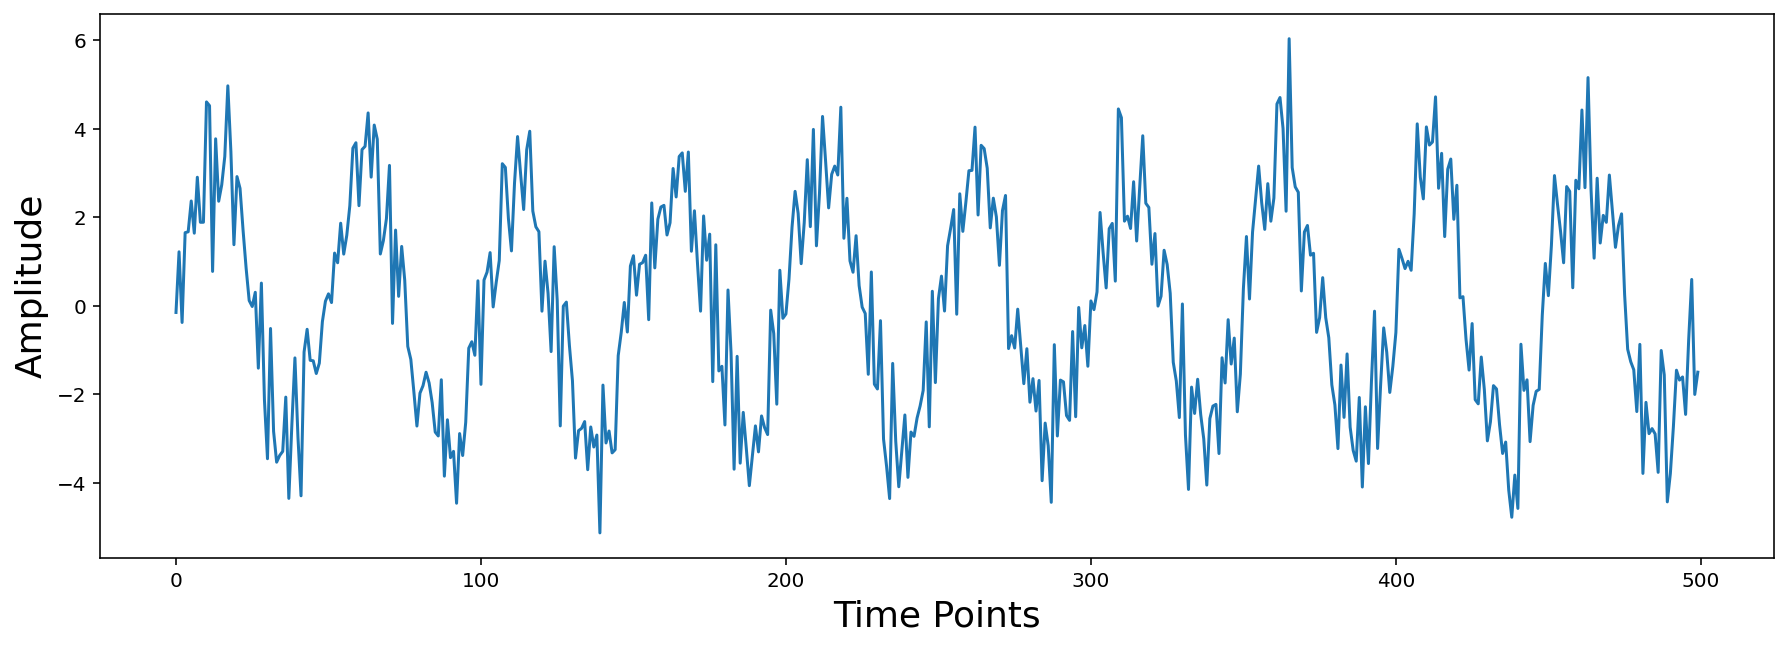

In [26]:
time = np.arange(500)
waveform = 3 * np.sin(2 * np.pi * 1/50 * time) + np.random.randn(500)

plt.plot(time, waveform)
plt.xlabel('Time Points')
plt.ylabel('Amplitude');

### The same waveform overlaid with a copy of itself but shifted in time.

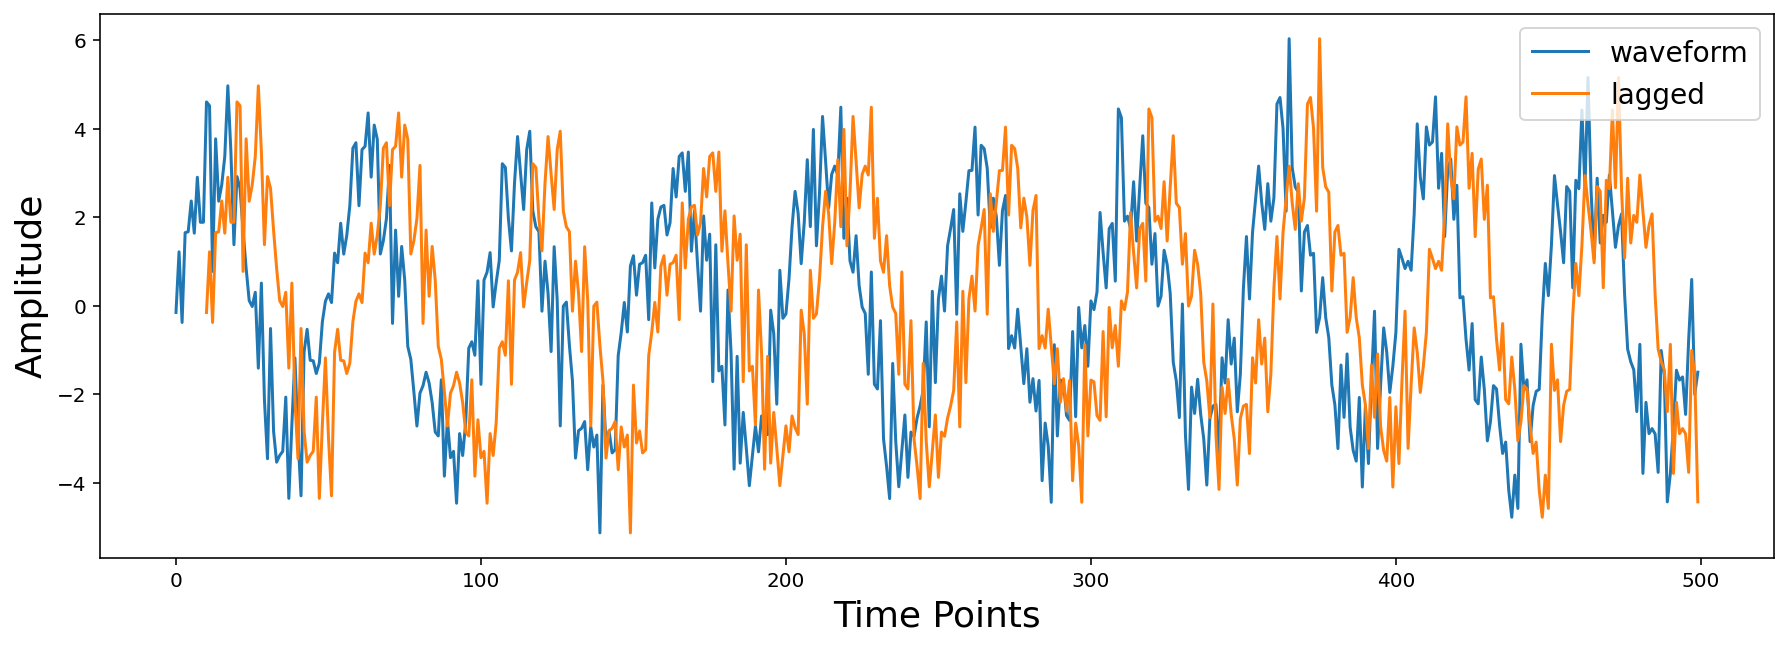

In [27]:
plt.plot(time, waveform, label='waveform')
plt.plot(time[10:], waveform[:-10], label='lagged')
plt.xlabel('Time Points')
plt.ylabel('Amplitude')
plt.legend();

# Autocorrelation

Correlation of a waveform with itself.

/Users/marcel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:665: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


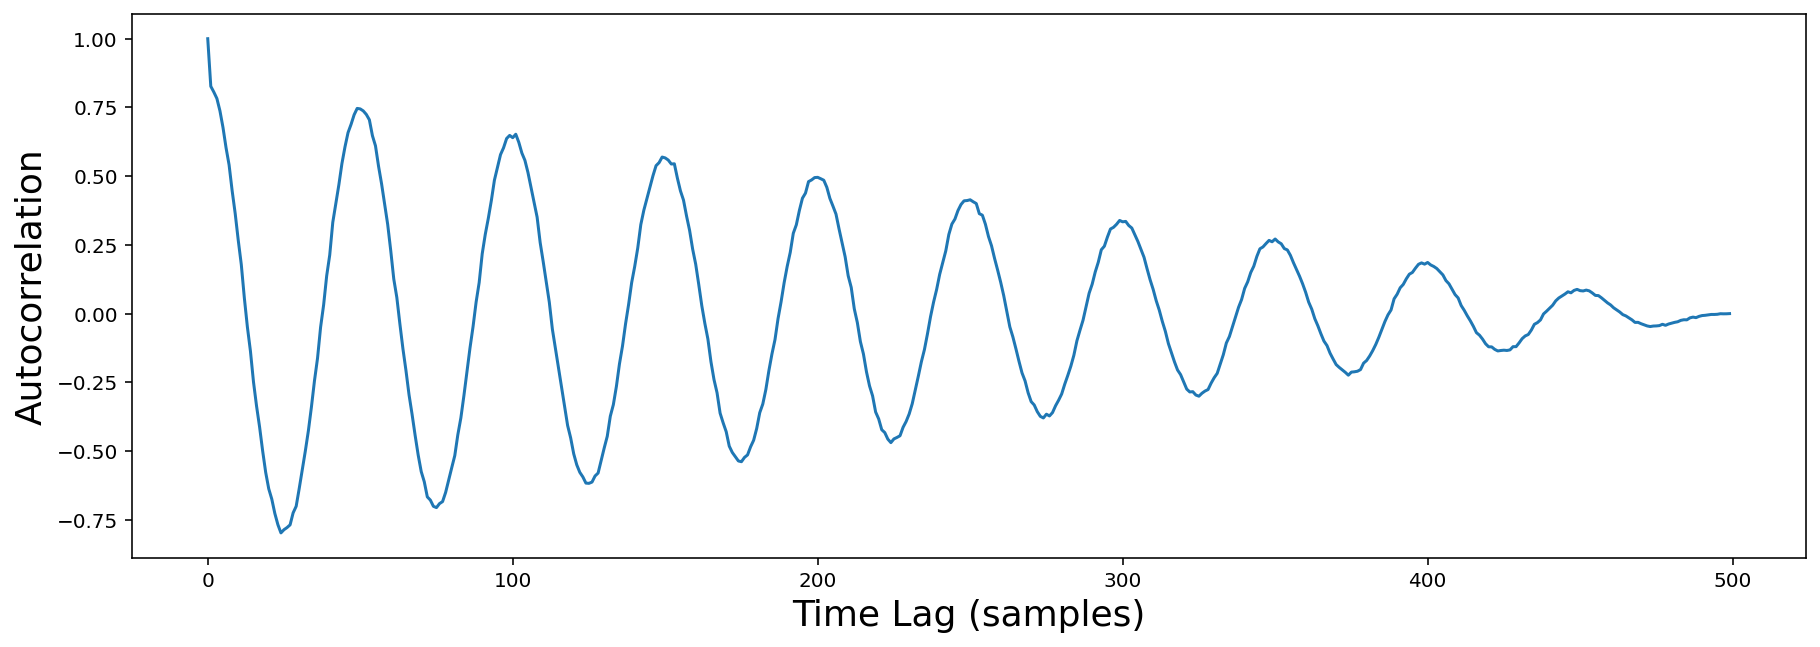

In [28]:
from statsmodels.tsa.stattools import acf

# correlation of waveform with itself for lags from 0-499 time points
autocorrelation = acf(waveform, nlags=500)

plt.plot(autocorrelation)
plt.xlabel('Time Lag (samples)')
plt.ylabel('Autocorrelation');

### An EEG waveform.

In [19]:
eeg_uV = np.array([ 7.99263716e-01,  3.20453477e+00,  2.32451677e+00,  2.99096251e+00,
        2.95125079e+00,  2.07323146e+00,  3.67824244e+00,  3.33407354e+00,
        3.18097234e+00,  2.57801104e+00,  2.56908560e+00,  2.23031139e+00,
        2.69823503e+00,  2.76596498e+00,  3.05247116e+00,  1.45715261e+00,
        3.36093020e+00,  3.17861724e+00,  3.18882823e+00,  2.84125400e+00,
        2.82957220e+00,  2.40654016e+00,  2.49908733e+00,  3.93868208e+00,
        3.28607726e+00,  2.90427375e+00,  2.35433936e+00,  2.01281786e+00,
        2.29527426e+00,  1.95660460e+00,  1.77596152e+00,  2.10410547e+00,
        2.30907845e+00,  2.73117661e+00,  3.16049576e+00,  3.11193728e+00,
        3.83683133e+00,  3.36231589e+00,  4.38690233e+00,  3.22657943e+00,
        4.06150150e+00,  3.98803377e+00,  3.33341861e+00,  4.67433119e+00,
        3.93356562e+00,  3.31128120e+00,  3.51423979e+00,  3.50051785e+00,
        2.83747530e+00,  2.86140251e+00,  2.93875647e+00,  2.66065621e+00,
        2.10540080e+00,  2.26423168e+00,  2.70363522e+00,  1.87502515e+00,
        2.24604321e+00,  1.85253787e+00,  1.10646093e+00,  1.93581748e+00,
        8.85520995e-01,  1.55400133e+00,  8.57437849e-01,  2.11681263e-03,
        3.31405520e-01,  7.15300024e-01,  8.17477554e-02,  1.01886165e+00,
        3.58378664e-02,  7.88056478e-02, -5.31301610e-02,  1.15285181e-02,
       -5.70677102e-01, -4.45085853e-01, -4.67251986e-01, -7.64465392e-01,
       -1.38555694e+00, -1.47661817e+00, -1.31803536e+00, -1.33042049e+00,
       -9.26028848e-01, -2.25337815e+00, -2.98349643e+00, -1.75738716e+00,
       -1.75983071e+00, -1.98427296e+00, -1.65334618e+00, -1.48713875e+00,
       -1.82748890e+00, -2.36522126e+00, -8.58658135e-01, -1.02472889e+00,
       -9.83468115e-01, -1.63966632e+00, -8.13248694e-01, -1.11178756e+00,
       -1.53469694e+00, -1.39900362e+00, -2.42044449e+00, -4.58633780e-01,
       -1.24245536e+00, -1.23174298e+00, -1.80914867e+00, -1.09792578e+00,
       -2.19788834e-01, -3.91566187e-01, -5.46141744e-01, -2.61245072e-01,
       -9.71207201e-01,  1.80505276e-01,  2.12751739e-02, -4.99209046e-01,
        2.77782142e-01, -6.39305830e-01, -1.51229575e-01, -3.92631769e-01,
        2.83742756e-01, -7.91099787e-01, -1.51982620e-01,  8.96941185e-01,
       -5.05389929e-01, -1.29613113e+00, -1.40133357e+00, -1.09832418e+00,
       -7.26004720e-01, -1.60111558e+00, -7.76258707e-01, -1.62094581e+00,
       -3.73068064e-01, -1.31551611e+00, -1.89829636e+00, -5.63772798e-01,
       -7.26958513e-01, -1.34779319e-01,  5.67472354e-02,  7.18996346e-01,
        8.75397101e-02, -3.74656409e-01,  2.15253636e-01,  3.95852208e-01,
       -6.99114382e-01, -2.36883461e-02, -3.51170272e-01, -3.83369088e-01,
       -3.83628339e-01, -3.63038123e-01, -5.20044565e-01, -5.60551345e-01,
       -8.50981951e-01,  2.15458959e-01, -4.07105505e-01, -6.80982172e-01,
       -6.56360015e-02, -2.86414862e-01, -3.25457484e-01, -5.09348452e-01,
        2.22844079e-01, -1.19338065e-01, -4.54005659e-01,  6.45172149e-02,
        5.45725524e-01,  2.27788508e-01,  2.14903280e-02, -7.68260896e-01,
        9.60702002e-02,  1.51404336e-01,  6.88524425e-01,  7.15013921e-01,
       -7.32056648e-02,  5.25893211e-01,  6.97088838e-01,  7.99444735e-01,
        7.21751750e-01,  7.19343781e-01,  1.17509313e-01,  8.96378636e-01,
        9.42050636e-01,  5.38066745e-01,  3.79113644e-01,  5.61982453e-01,
       -4.07359190e-02,  7.59371877e-01,  4.28462565e-01, -7.00114369e-01,
       -3.55375618e-01, -2.26157665e-01, -2.31882930e-01,  2.03893185e-02,
        5.77020347e-01,  1.96796566e-01, -4.78774756e-02,  8.14633369e-01,
        7.37142861e-01, -3.76670152e-01, -1.12248592e-01, -6.17118895e-01,
       -1.27434111e+00, -5.19831121e-01, -9.70791876e-01, -1.16911042e+00,
       -1.04738796e+00, -1.95756996e+00, -1.21118259e+00, -6.39578640e-01,
       -4.81419504e-01, -1.28147721e+00,  4.52927470e-01,  6.01281971e-02,
       -1.71167746e-01,  3.38981003e-01,  8.08044732e-01,  4.08845395e-01,
        7.25950837e-01,  1.24622834e+00, -6.14392698e-01, -2.85137951e-01,
        7.01438963e-01,  1.47698298e-01,  1.13267340e-01,  3.11485916e-01,
       -3.11249793e-01, -1.57307178e-01,  5.04421592e-01,  6.86937511e-01,
       -2.91096032e-01,  6.34591877e-02, -6.35234833e-01, -6.01996124e-01,
        3.39807719e-01, -1.27645910e-01, -1.28395230e-01, -7.85656393e-01,
        4.38407123e-01,  6.73599169e-02, -1.66758418e-01, -1.34611636e-01,
       -7.35705972e-01, -1.09363270e+00, -1.38281918e+00, -7.10241139e-01,
       -1.09283161e+00, -5.53040266e-01, -4.66702431e-01, -4.03561145e-01,
       -5.30590653e-01,  1.78266943e-01, -3.17033648e-01,  1.83481678e-01,
        6.48464024e-01, -4.26013172e-02,  2.03712925e-01, -5.36359809e-02,
        9.53794062e-01,  1.22623241e+00,  9.44951355e-01,  3.93549412e-01,
        9.23798084e-01,  1.24578214e+00,  2.29820862e-01,  1.29890192e+00,
        6.57313347e-01, -1.45417321e-02,  1.24840510e+00, -1.37040123e-01,
        1.20659336e-01, -1.36338517e-01, -1.55860901e-01, -6.87688053e-01,
       -1.04881160e-01, -7.32815742e-01,  1.19859003e-01, -9.33645129e-01,
       -5.00520945e-01, -5.21559119e-02, -7.68396258e-01,  3.34727943e-01,
        2.37182572e-01,  8.91254485e-01,  1.20330381e+00,  7.49721646e-01,
        3.45261842e-01, -4.81794178e-01, -2.19951034e+00, -7.01962769e-01,
       -9.17551219e-02,  1.03388143e+00,  6.83439016e-01,  2.31528234e+00,
        2.96089673e+00,  1.27630365e+00,  1.24336135e+00,  1.23832083e+00,
        5.46480156e-02,  1.18772888e+00,  1.58343065e+00,  1.49319077e+00,
        1.91689062e+00,  2.10358596e+00,  1.00890112e+00,  1.81117654e+00,
        2.33323407e+00,  2.60636306e+00,  2.39658380e+00,  3.98268080e+00,
        5.01225948e+00,  5.82258415e+00,  6.43058634e+00,  6.79025173e+00,
        6.63568068e+00,  6.13959980e+00,  5.67076635e+00,  2.99180984e+00,
        2.55179238e+00,  2.14307761e+00,  1.20502138e+00,  1.27293909e+00,
       -6.50303245e-01,  2.48398930e-01,  5.26413858e-01, -1.14647478e-01,
        5.48198402e-01,  1.02332436e-01, -5.16828656e-01, -5.20811856e-01,
        4.65165466e-01,  7.43647575e-01,  6.97913527e-01,  2.36138433e-01,
        4.95300561e-01,  9.00662661e-01,  1.47457266e+00,  8.27651203e-01,
        1.06250262e+00,  1.80036759e+00,  2.44940352e+00,  1.56416595e+00,
        1.92463088e+00,  2.53959322e+00,  3.88353729e+00,  3.15129471e+00,
        3.44999194e+00,  3.94891858e+00,  3.45071292e+00,  4.19435978e+00,
        4.46657228e+00,  3.82494617e+00,  5.02802515e+00,  5.18988800e+00,
        5.28867912e+00,  5.41830063e+00,  6.48895454e+00,  5.86283636e+00,
        4.81231689e+00,  6.03701115e+00,  5.48778725e+00,  4.74015713e+00,
        5.96341944e+00,  5.05302334e+00,  5.26999617e+00,  5.38548946e+00,
        5.35455275e+00,  4.81605339e+00,  4.67712212e+00,  4.40581465e+00,
        3.00225925e+00,  3.46769047e+00,  3.18293381e+00,  2.36635709e+00,
        3.16274619e+00,  2.70516753e+00,  1.92360783e+00,  3.54335833e+00,
        3.48667955e+00,  2.89500451e+00,  3.54918170e+00,  2.85223198e+00,
        2.89690518e+00,  2.49828672e+00,  3.69661188e+00,  2.58403468e+00,
        2.11900926e+00,  2.56375360e+00,  1.35088587e+00,  1.87456834e+00,
        2.13885880e+00,  2.20056129e+00,  1.37663054e+00,  1.15605521e+00,
        1.65966749e+00,  2.37382388e+00,  2.55429077e+00,  2.58696890e+00,
        2.24504018e+00,  2.49579763e+00,  2.78881860e+00,  2.93773699e+00,
        3.36445236e+00,  2.98386216e+00,  3.21965051e+00,  3.74506807e+00,
        3.21228123e+00,  3.08041286e+00,  2.91644502e+00,  2.43768978e+00,
        3.08618188e+00,  3.33929443e+00,  2.92517161e+00,  3.72959399e+00,
        2.56368136e+00,  2.86503339e+00,  3.40250134e+00,  3.67091918e+00,
        2.58703685e+00,  3.00237489e+00,  3.31698060e+00,  2.44217777e+00,
        2.45584464e+00,  2.36537671e+00,  2.48268294e+00,  1.17321336e+00,
        1.68265045e+00,  3.51674408e-01,  5.36619008e-01, -2.08302155e-01,
       -6.56199276e-01, -4.58073676e-01,  5.00213325e-01, -2.07337007e-01,
       -9.62419093e-01, -1.44099462e+00, -1.46004295e+00, -9.06552255e-01,
       -1.32168519e+00, -1.28357780e+00, -1.49933755e+00, -6.70274377e-01,
       -6.94029033e-02, -3.18246603e-01, -1.25560212e+00, -8.23934555e-01,
       -1.13600791e-01, -8.20176542e-01, -4.50547159e-01, -1.79742560e-01,
       -4.60703909e-01,  9.09724012e-02, -9.41872001e-02, -2.02221423e-01,
       -3.18800598e-01, -1.44873202e+00, -1.30087066e+00, -1.37254477e+00,
       -6.81825221e-01, -1.01894677e+00, -1.46897006e+00, -7.99088359e-01,
       -1.56381500e+00, -1.74938917e+00, -1.49962938e+00, -8.90134156e-01,
       -1.37595499e+00, -2.20422888e+00, -1.46084476e+00, -1.09440887e+00,
       -1.76983333e+00, -1.19331717e+00, -1.71766615e+00, -1.48415029e+00,
       -8.31143916e-01, -4.82468992e-01, -2.82775700e-01,  9.14366245e-02,
       -2.69199139e-03, -3.01332802e-01, -7.45271221e-02, -4.20184791e-01,
       -1.22812402e+00, -1.37936831e+00, -8.68966520e-01, -9.91255403e-01,
       -1.52929282e+00, -1.54256237e+00, -6.26470387e-01,  2.91609466e-01,
       -1.78308338e-01, -6.35619640e-01, -3.86198223e-01, -1.20093000e+00,
       -3.36084008e-01, -8.37850630e-01, -2.20345402e+00, -1.10333729e+00,
       -1.64029348e+00, -1.84588063e+00, -9.25052047e-01, -5.07705688e-01,
       -1.06458664e+00, -9.17084992e-01, -7.77340531e-02, -1.28067064e+00,
       -1.52685404e+00, -1.30454028e+00, -1.79453206e+00, -1.49469578e+00,
       -1.59027934e+00, -1.42655051e+00, -2.20504951e+00, -1.74353588e+00,
       -1.35293806e+00, -9.61870670e-01, -1.48502910e+00, -1.31604159e+00,
       -1.07369196e+00, -7.78178871e-01, -1.22767389e+00, -6.35363281e-01,
       -6.56373143e-01, -1.78796977e-01, -8.87847602e-01, -1.36769176e+00,
       -9.91862774e-01, -7.87249327e-01,  1.86417371e-01, -1.50543883e-01,
        2.38326371e-01, -6.78450406e-01, -8.36194813e-01, -1.07208848e+00,
       -1.02102232e+00, -1.28880215e+00, -9.17871416e-01,  9.84515920e-02,
       -1.58947396e+00, -1.40922034e+00,  1.96352769e-02, -8.56655061e-01,
       -1.28617561e+00, -1.09437263e+00, -5.77365637e-01, -2.32622695e+00,
       -1.11985362e+00, -1.72282672e+00, -1.89784348e+00, -1.27712226e+00,
       -8.60462666e-01, -2.96721339e-01, -6.63098633e-01, -6.23786390e-01,
       -7.51413345e-01,  4.29293305e-01,  3.01729232e-01, -1.34670341e+00,
       -9.95723128e-01, -3.71817231e-01,  4.09305751e-01, -1.59630626e-02,
       -9.80625451e-02,  3.51011038e-01,  7.96382844e-01,  2.61920959e-01,
        9.21876490e-01,  7.46048272e-01,  1.13343775e+00,  6.78247333e-01,
        9.56125975e-01,  9.15520966e-01,  7.82550514e-01,  8.55496407e-01,
        4.98154640e-01,  1.39871943e+00,  2.26936007e+00,  1.12895000e+00,
        5.25742292e-01,  1.93512022e+00,  2.32314658e+00,  1.36178887e+00,
        1.10633755e+00,  8.95384610e-01, -1.09561421e-01,  5.72895885e-01,
        2.23975137e-01, -6.34047627e-01,  3.86874646e-01, -5.91705620e-01,
       -6.14648581e-01, -7.32012033e-01, -4.29314226e-01,  6.48588717e-01,
        7.43330047e-02, -7.30401158e-01,  9.27372813e-01,  1.03928447e+00,
        3.08574084e-02,  1.55580020e+00,  9.27467525e-01,  7.78156996e-01,
        3.62426251e-01,  3.82276297e-01,  4.18154329e-01,  2.51854837e-01,
        1.28925478e+00,  1.18367541e+00,  1.83900499e+00,  5.40414393e-01,
        9.69204664e-01,  1.15556860e+00,  1.77076936e+00,  1.31623912e+00,
       -4.47926402e-01,  9.67909455e-01,  1.85925221e+00,  7.73959160e-01,
        4.20467347e-01, -1.02765188e-01,  5.45462191e-01,  1.39935005e+00,
        6.38551831e-01,  6.59032166e-01,  3.19662429e-02,  2.42156193e-01,
        1.66032538e-01,  4.60133910e-01, -3.62305254e-01, -5.49979746e-01,
       -8.71138513e-01, -8.66470575e-01, -7.29283571e-01, -4.87421989e-01,
        2.91809645e-02, -4.68097329e-01, -8.86694074e-01, -6.16590142e-01,
       -4.00639534e-01, -9.24395502e-01, -1.54553580e+00, -1.07156992e+00,
       -1.37063849e+00, -1.09150434e+00, -1.20975053e+00, -7.97084928e-01])

### An EEG waveform.

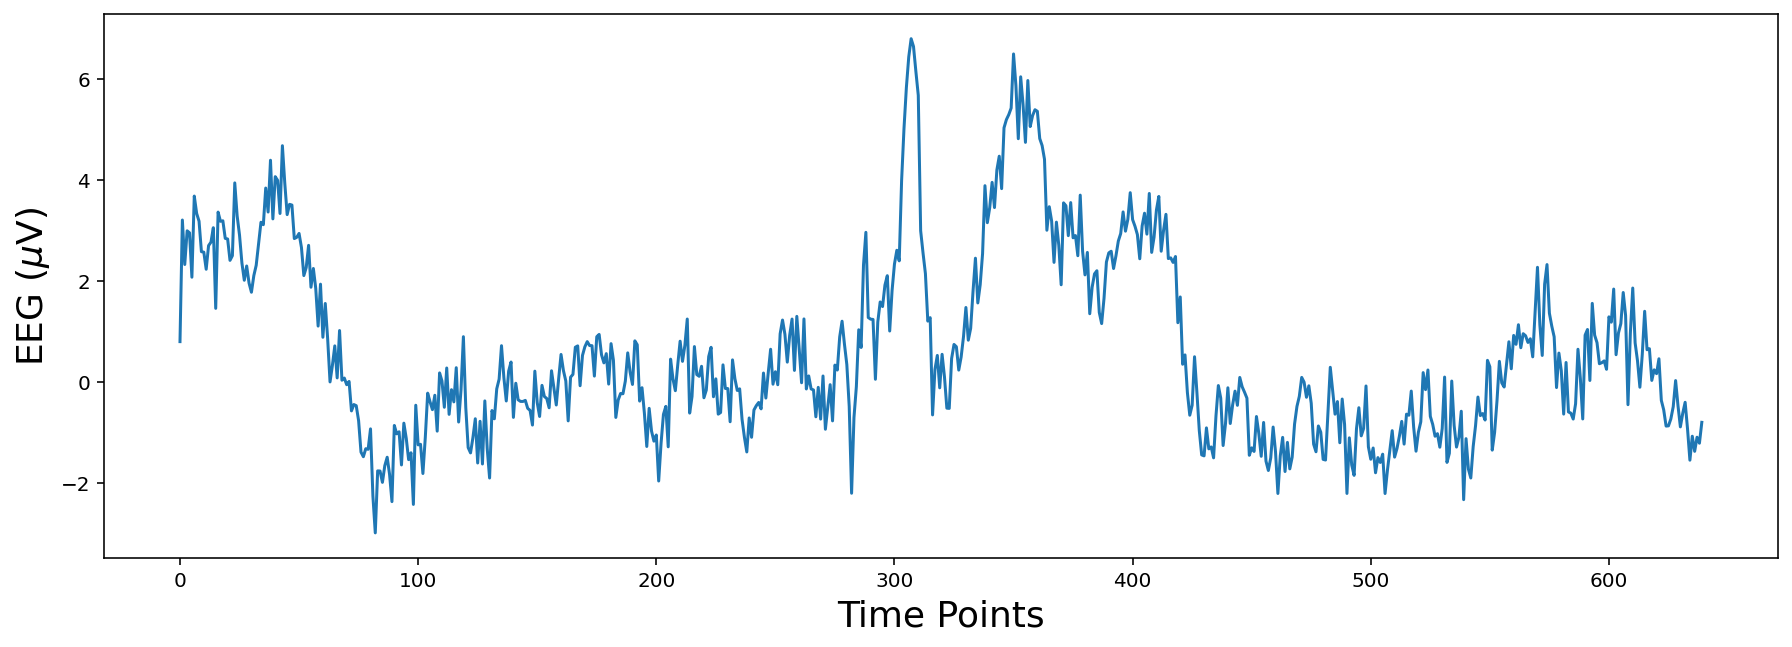

In [30]:
plt.plot(eeg_uV)
plt.xlabel('Time Points');
plt.ylabel('EEG ($\mu$V)');

# <font color=red>Exercise</font>

### Compute and plot the autocorrelation of the EEG for lags up to 600 time points.

In [ ]:
autocorrelation = ...

plt.figure(figsize=[15,6])
plt.subplot(2,1,1)
plt.plot(eeg_uV)
plt.xlabel('Time (samples)')
plt.ylabel('EEG ($\mu$V)')
plt.subplot(2,1,2)
plt.plot(autocorrelation)
plt.xlabel('Time Lag (samples)')
plt.ylabel('Autocorrelation')
plt.tight_layout();

# White Noise

A sequence of completely random numbers with mean zero is white noise.

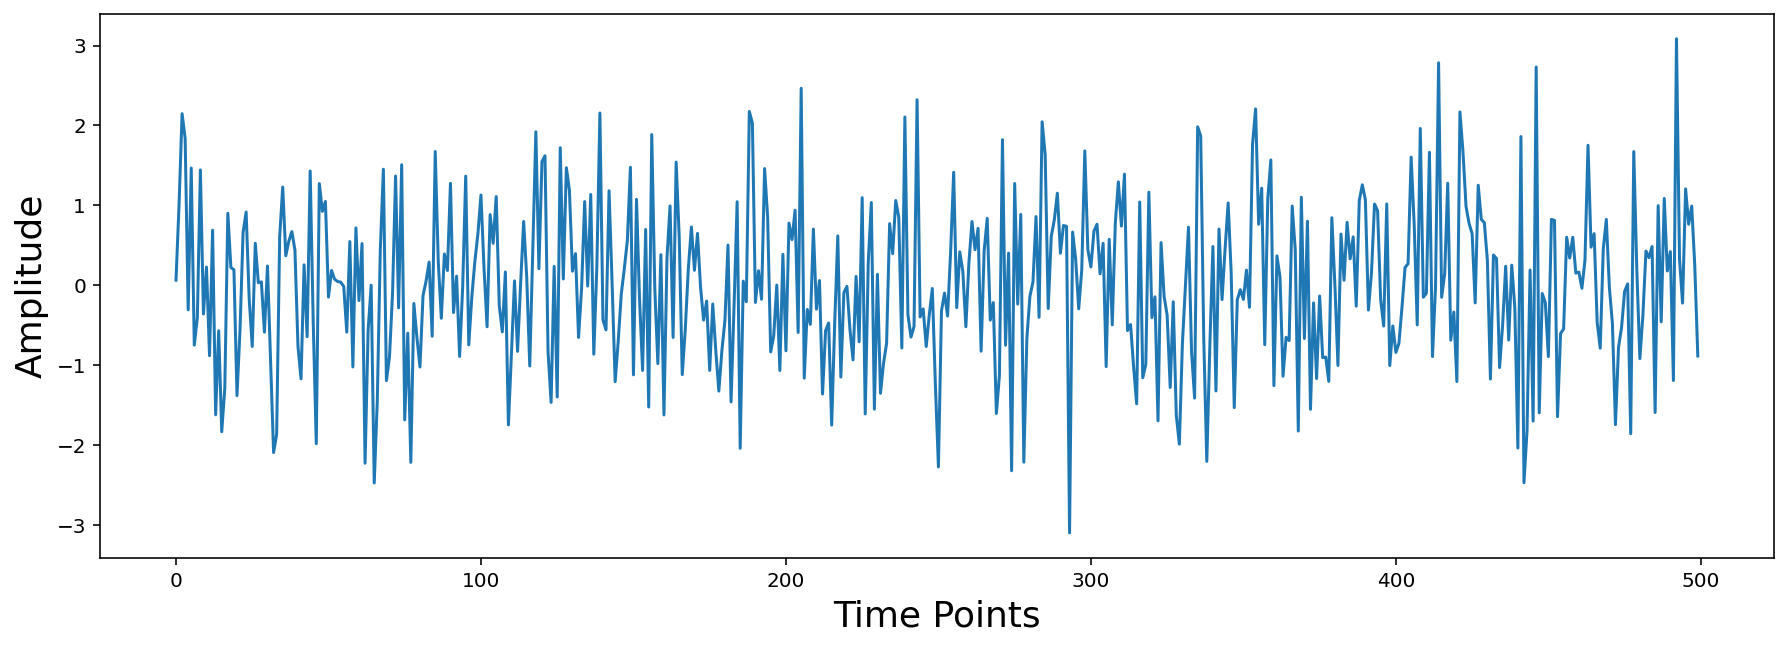

In [40]:
whitenoise = np.random.randn(500)

plt.plot(whitenoise)
plt.xlabel('Time Points')
plt.ylabel('Amplitude');

### White Noise is completely uncorrelated.

Even neighboring time points are unrelated.

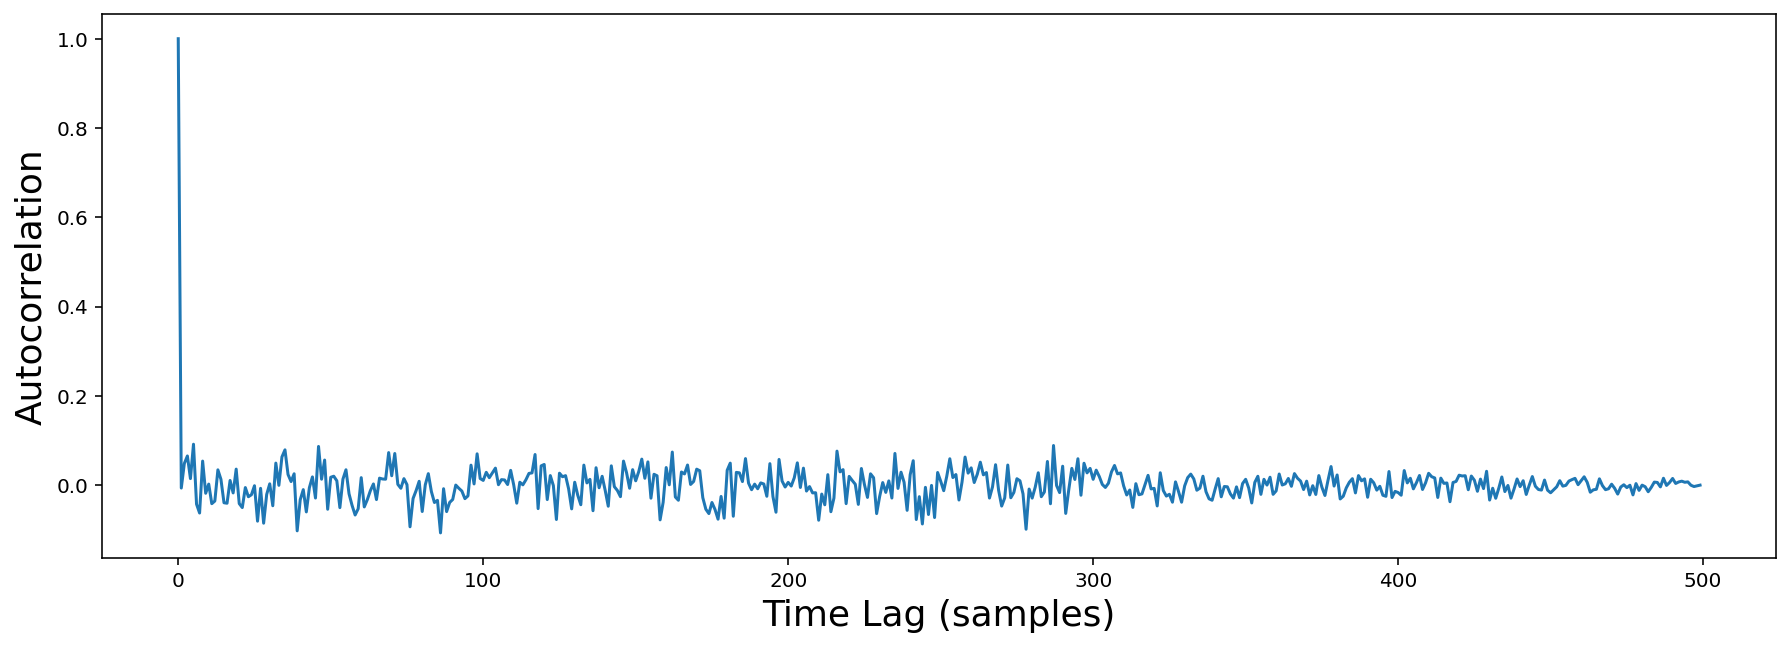

In [43]:
autocorrelation = acf(whitenoise, nlags=500, fft=True)

plt.plot(autocorrelation)
plt.xlabel('Time Lag (samples)')
plt.ylabel('Autocorrelation');

### EEG vs White Noise

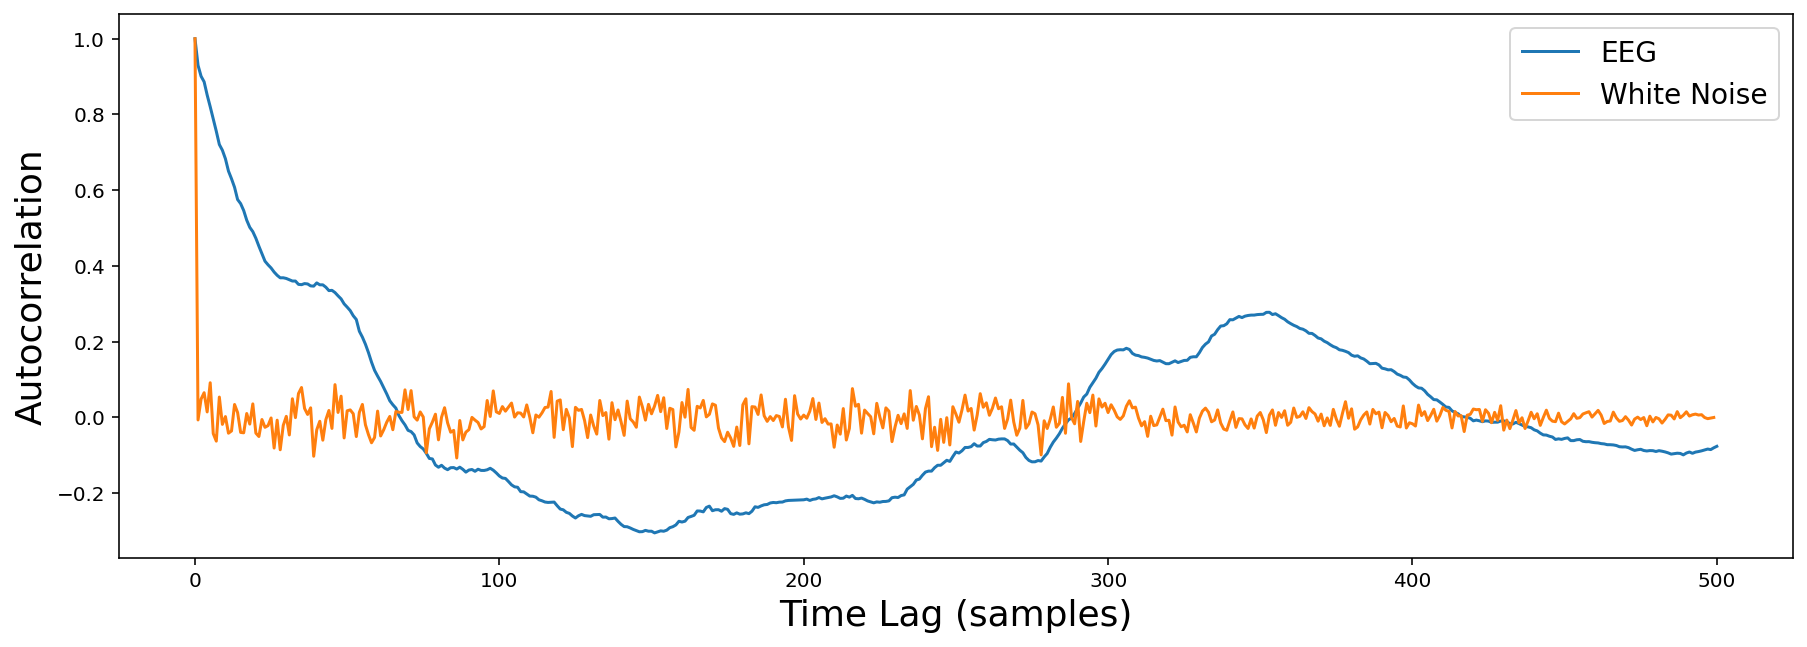

In [75]:
plt.plot(acf(eeg_uV, nlags=500, fft=True), label='EEG')
plt.plot(acf(whitenoise, nlags=500, fft=True), label='White Noise')
plt.xlabel('Time Lag (samples)')
plt.ylabel('Autocorrelation')
plt.legend();

# Sines and Cosines refresher

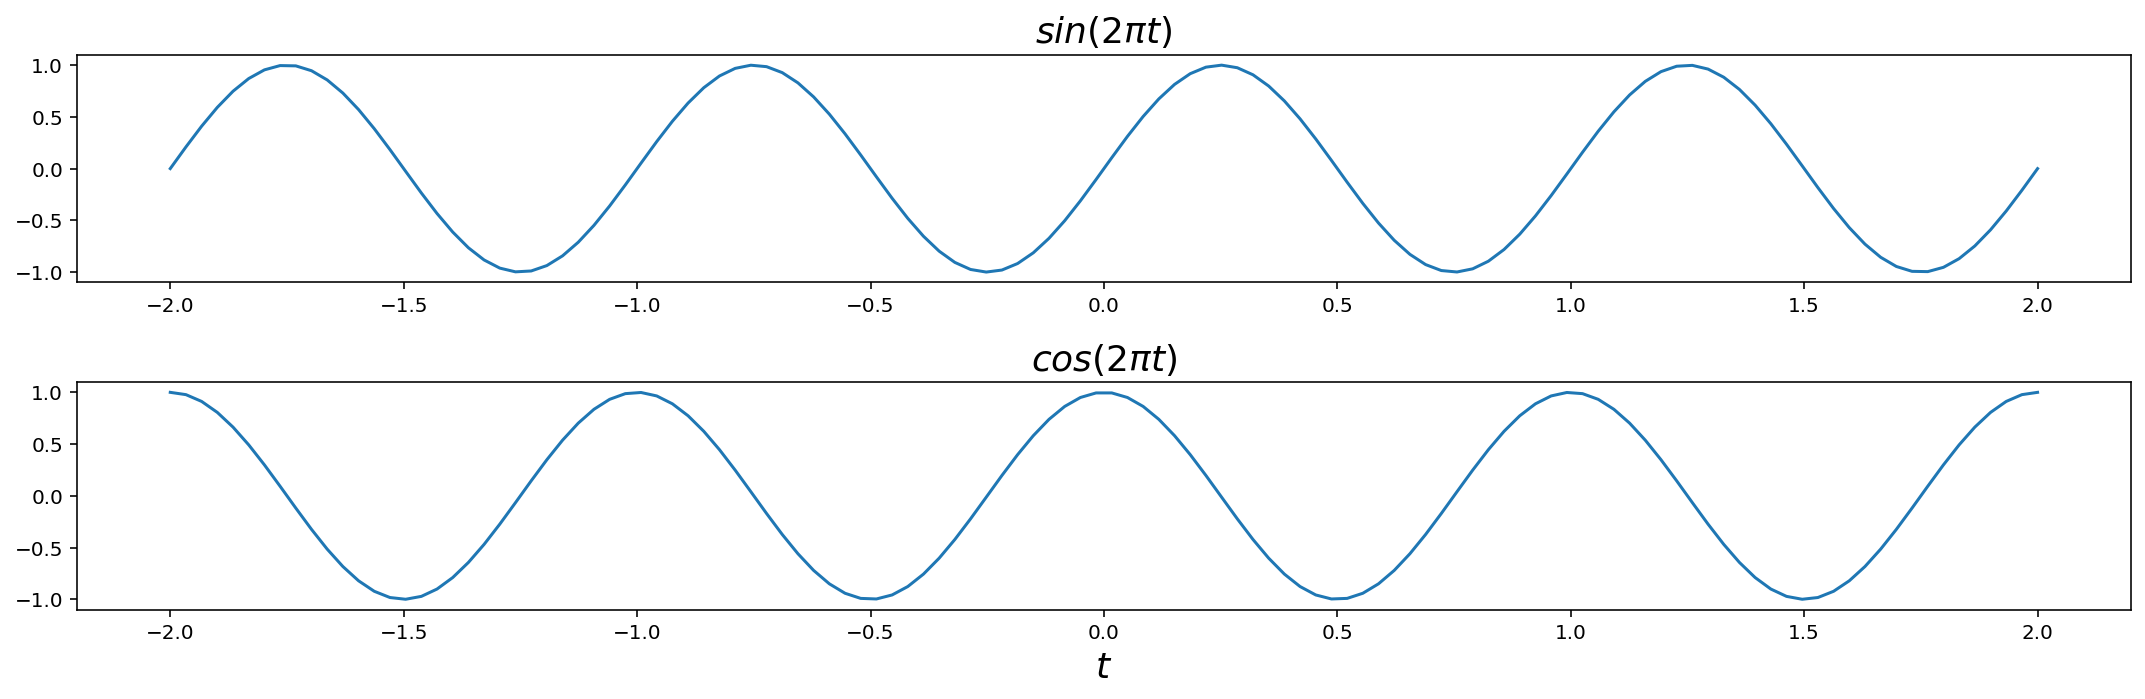

In [45]:
t = np.linspace(-2, 2, 120)
plt.subplot(2,1,1)
plt.plot(t, np.sin(2 * np.pi * t))
plt.title('$sin(2 \pi t)$')
plt.subplot(2,1,2)
plt.plot(t, np.cos(2 * np.pi * t))
plt.xlabel('$t$')
plt.title('$cos(2 \pi t)$')
plt.tight_layout();

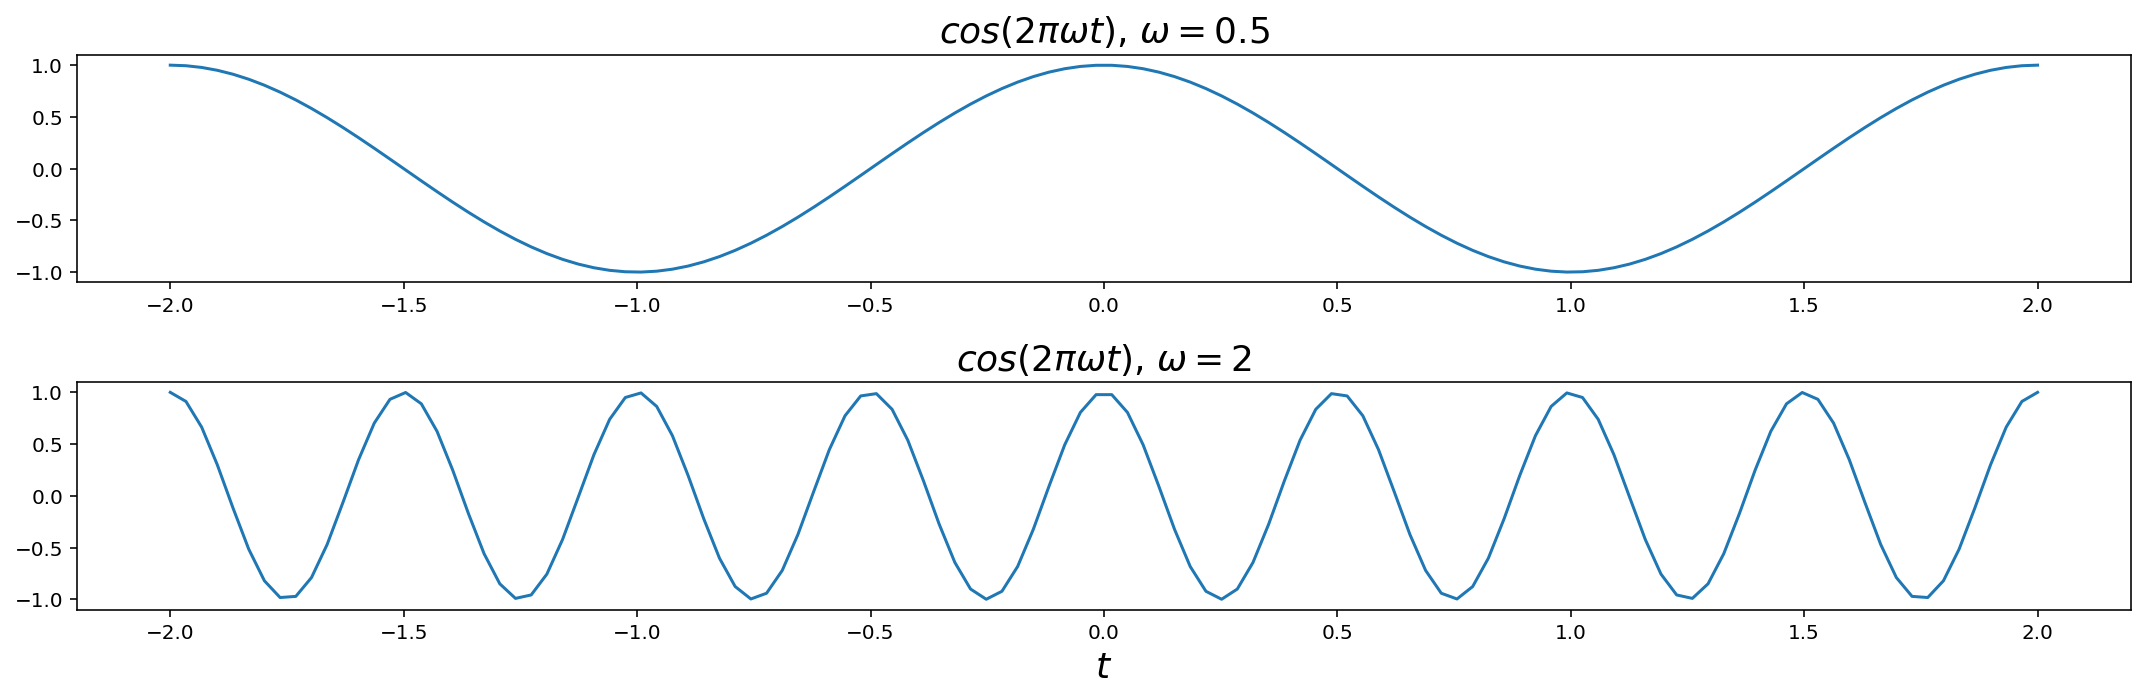

In [48]:
plt.subplot(2,1,1)
plt.plot(t, np.cos(2 * np.pi * 0.5 * t))
plt.title('$cos(2 \pi \omega t)$, $\omega = 0.5$')
plt.subplot(2,1,2)
plt.plot(t, np.cos(2 * np.pi * 2 * t))
plt.xlabel('$t$')
plt.title('$cos(2 \pi \omega t)$, $\omega = 2$')
plt.tight_layout();

# Sampling and Aliasing

In [50]:
# 1000 samples per second is one sample per millisecond
sampleFreq_Hz = 1000

# time between samples is 0.001 sec = 1 ms
dt_sec = 1 / sampleFreq_Hz

# array of time points from 0 to 1 sec at the sample rate
time_sec = np.arange(0, 1 + dt_sec, dt_sec)

# 5 cycles per second --> each cycle takes 0.2 sec
cycleFreq_Hz = 5

# sinusoidal waveform
waveform = np.sin(2 * np.pi * cycleFreq_Hz * time_sec)

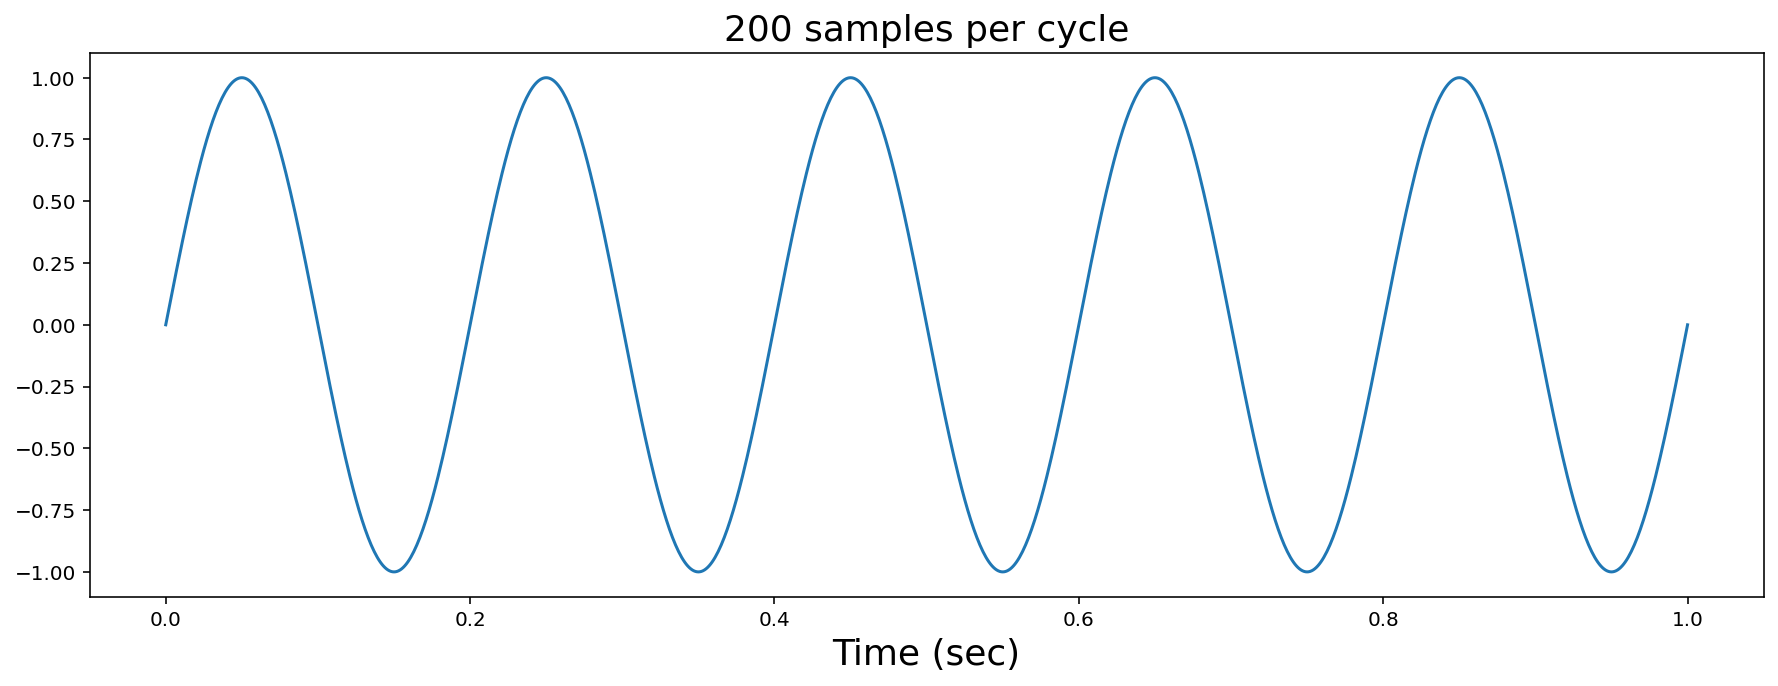

In [54]:
plt.plot(time_sec, waveform)

plt.xlabel('Time (sec)')
plt.title('200 samples per cycle');

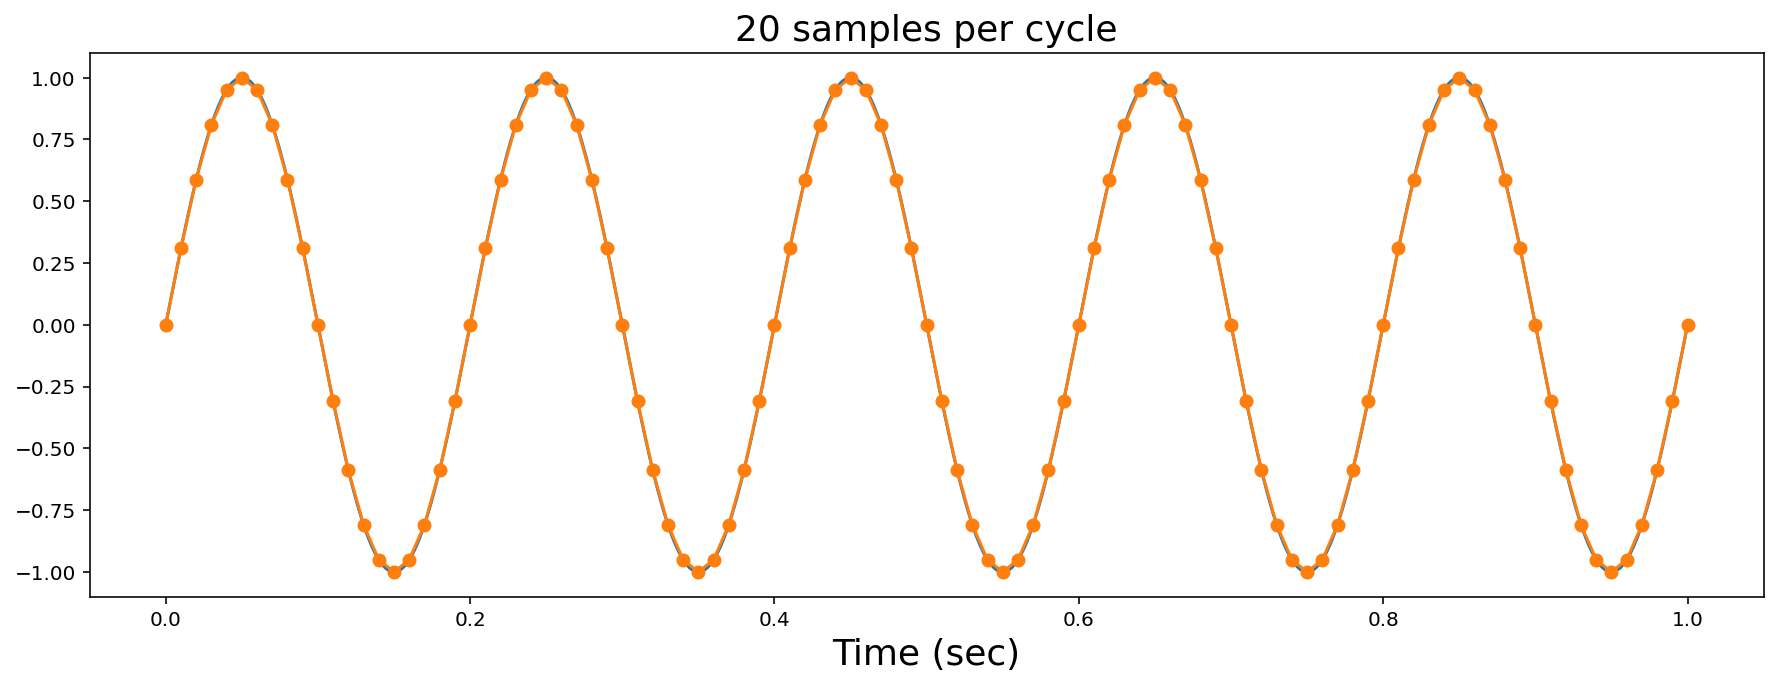

In [55]:
plt.plot(time_sec, waveform)
plt.plot(time_sec[::10], waveform[::10], 'o-')
plt.xlabel('Time (sec)')
plt.title('20 samples per cycle');

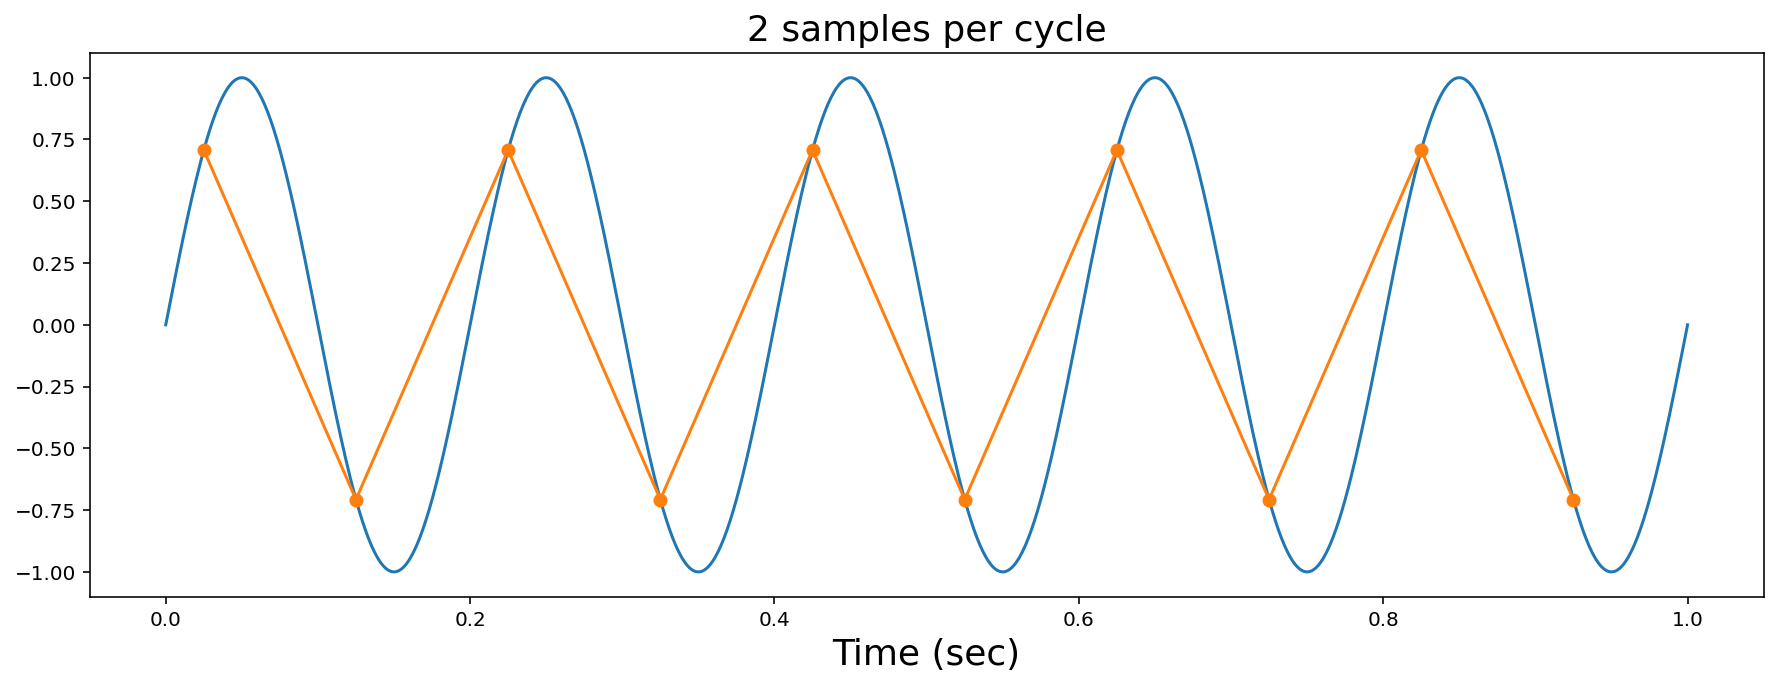

In [56]:
plt.plot(time_sec, waveform)
plt.plot(time_sec[25::100], waveform[25::100], 'o-')
plt.xlabel('Time (sec)')
plt.title('2 samples per cycle');

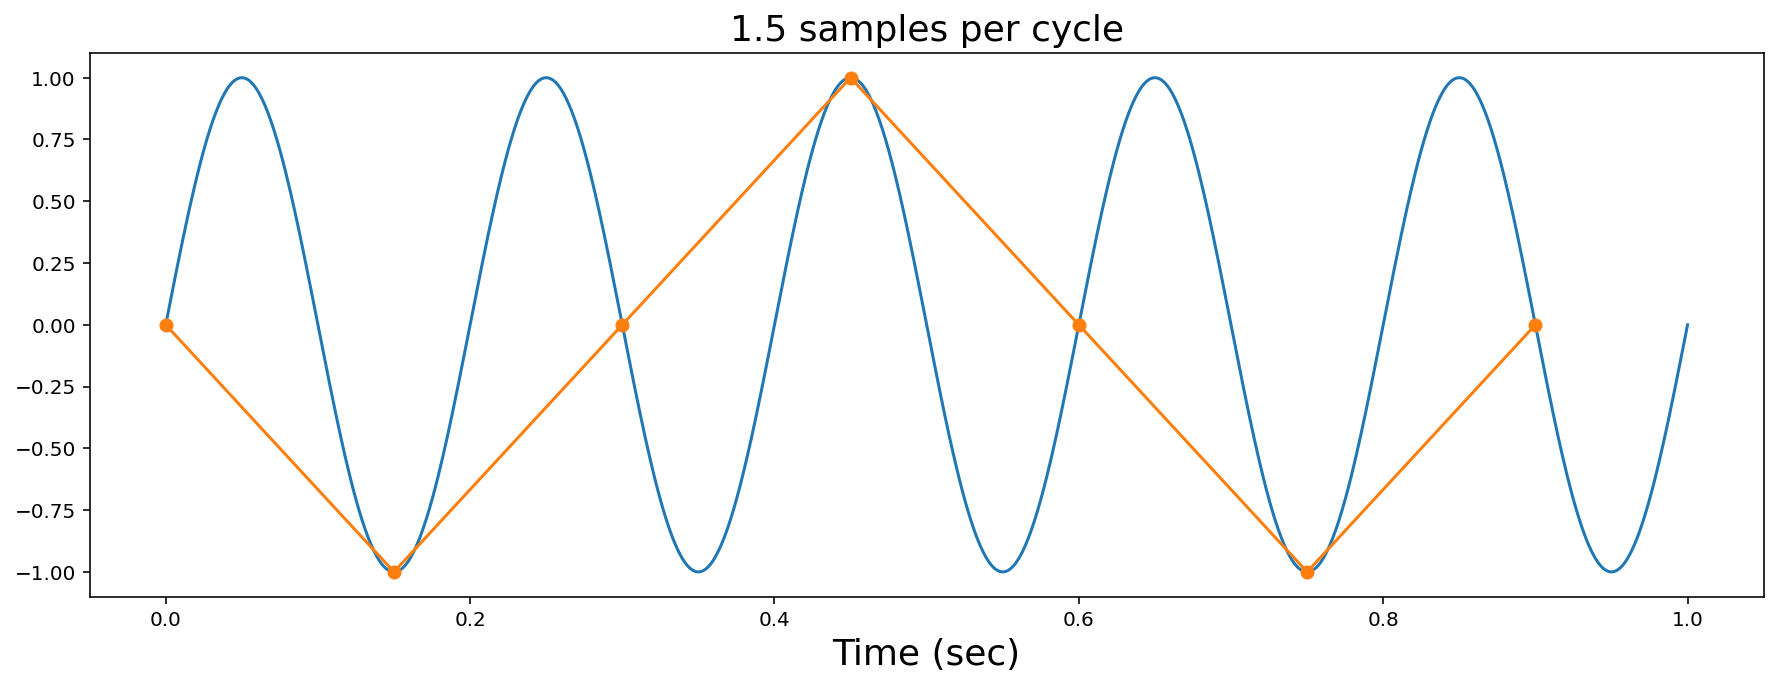

In [57]:
plt.plot(time_sec, waveform)
plt.plot(time_sec[::150], waveform[::150], 'o-')
plt.xlabel('Time (sec)')
plt.title('1.5 samples per cycle');

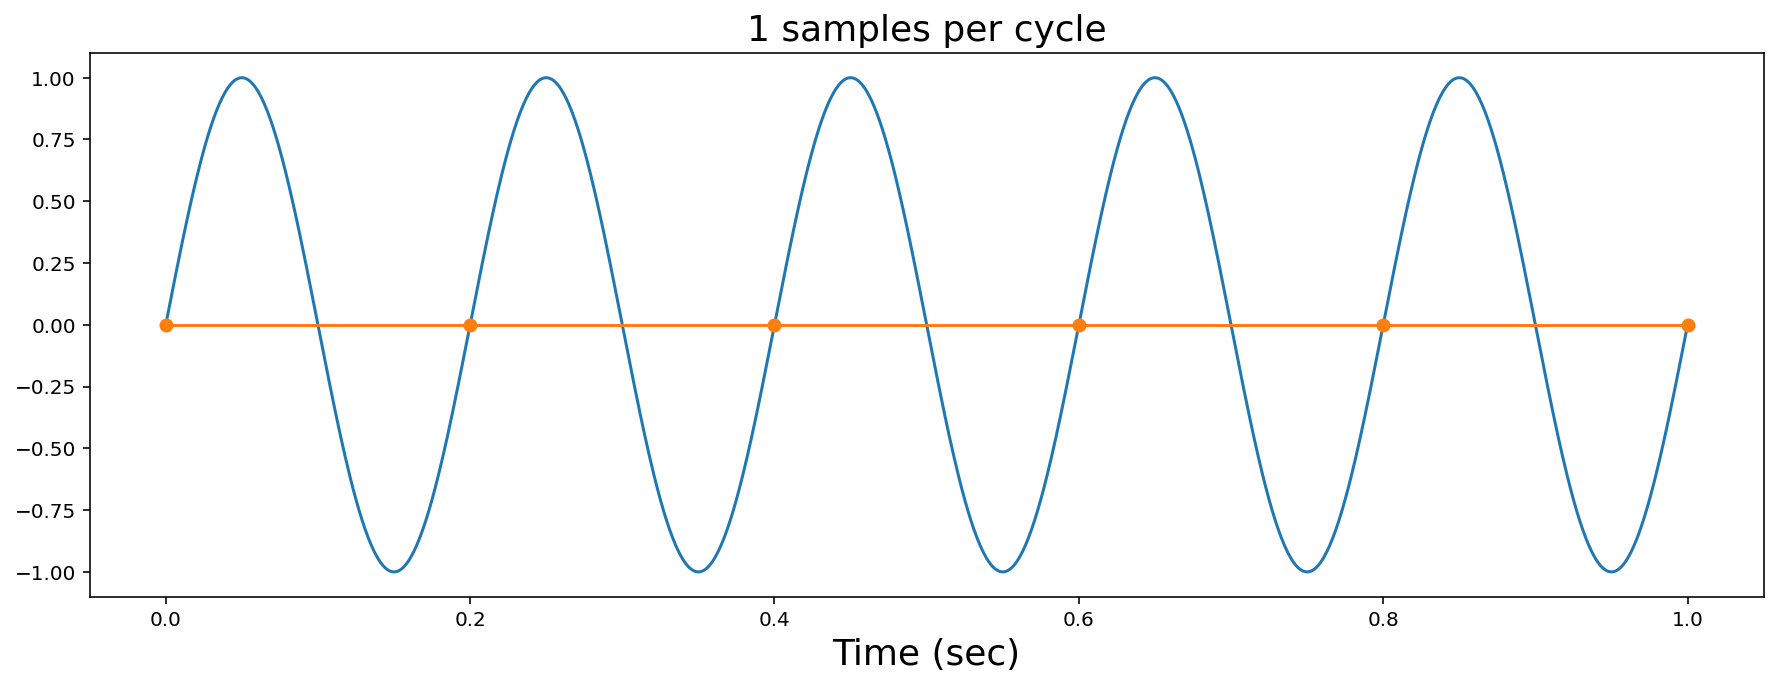

In [58]:
plt.plot(time_sec, waveform)
plt.plot(time_sec[::200], waveform[::200], 'o-')
plt.xlabel('Time (sec)')
plt.title('1 samples per cycle');

# Nyquist frequency

Minimum sampling frequency to resolve a signal is twice the frequency of the fastest component in the signal.

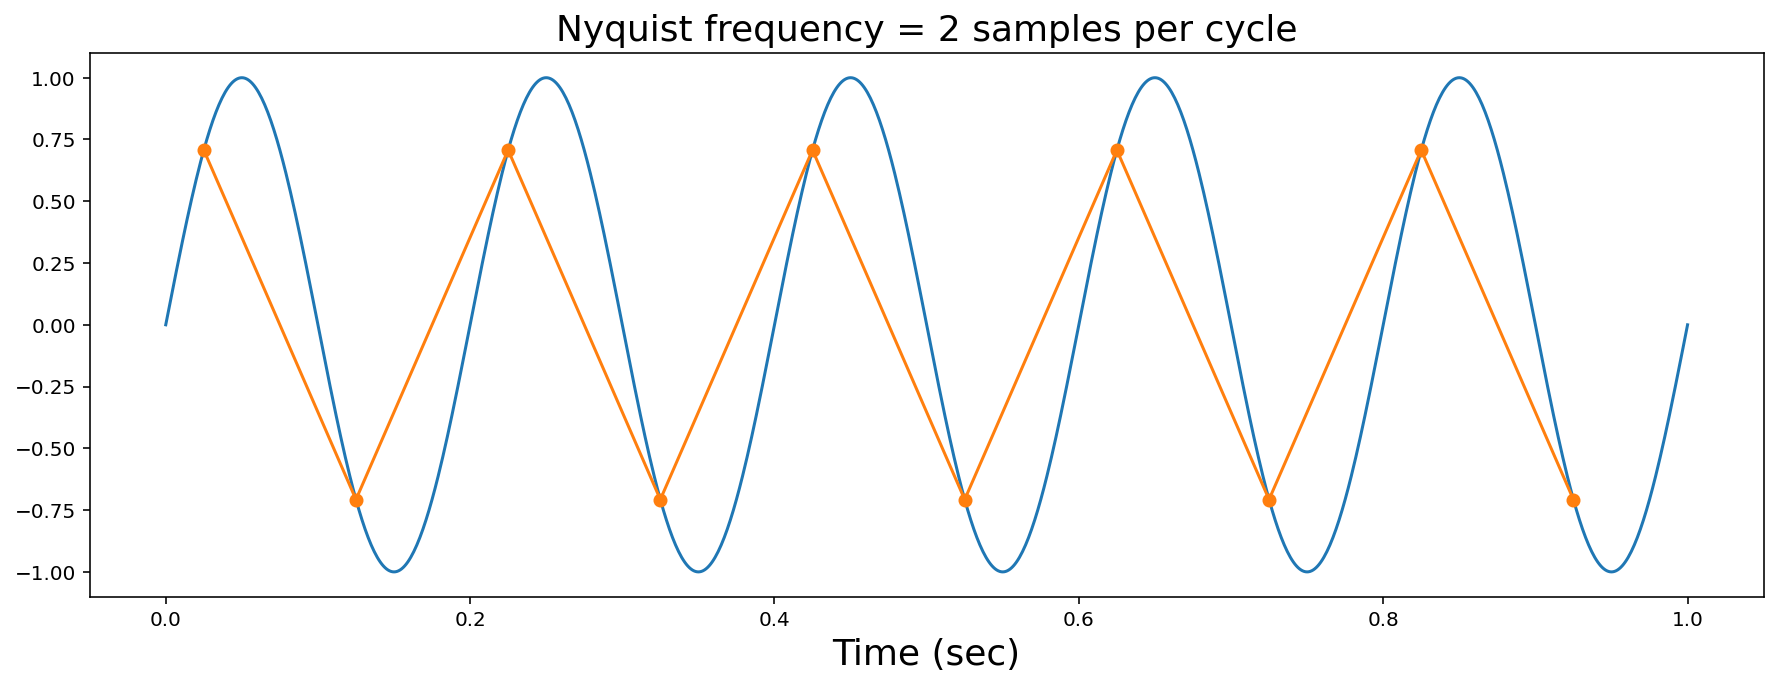

In [60]:
plt.plot(time_sec, waveform)
plt.plot(time_sec[25::100], waveform[25::100], 'o-')
plt.xlabel('Time (sec)')
plt.title('Nyquist frequency = 2 samples per cycle');

# Aliasing

Undersampling (e.g. below Nyquist) results in a low frequency alias artifact.

**!!! This is much worse than just missing the higher frequencies because you get artifactual lower frequencies.**

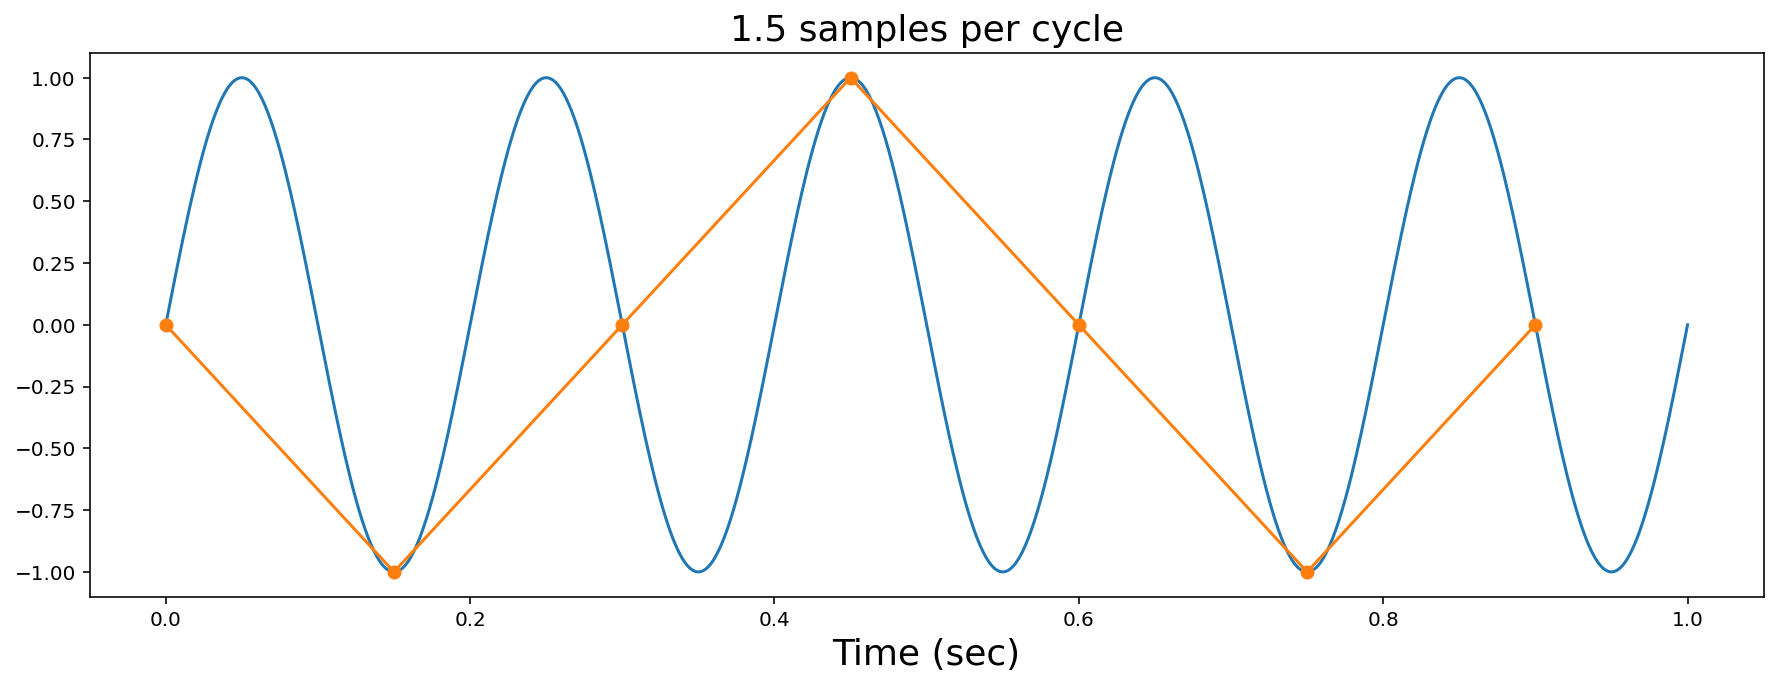

In [61]:
plt.plot(time_sec, waveform)
plt.plot(time_sec[::150], waveform[::150], 'o-')
plt.xlabel('Time (sec)')
plt.title('1.5 samples per cycle');

# <font color=red>Exercise</font>

You are going to record oscillations in membrane potential from a single neuron. You expect that the neruon will exhibit oscillations at both theta (~10 Hz) and gamma frequencies up to 80 Hz. What is the minimum sample rate necessary to resolve these oscillations?

### Simulate one second of data with 10 Hz and 80 Hz oscillations sampled at 1 kHz (1 ms between samples).

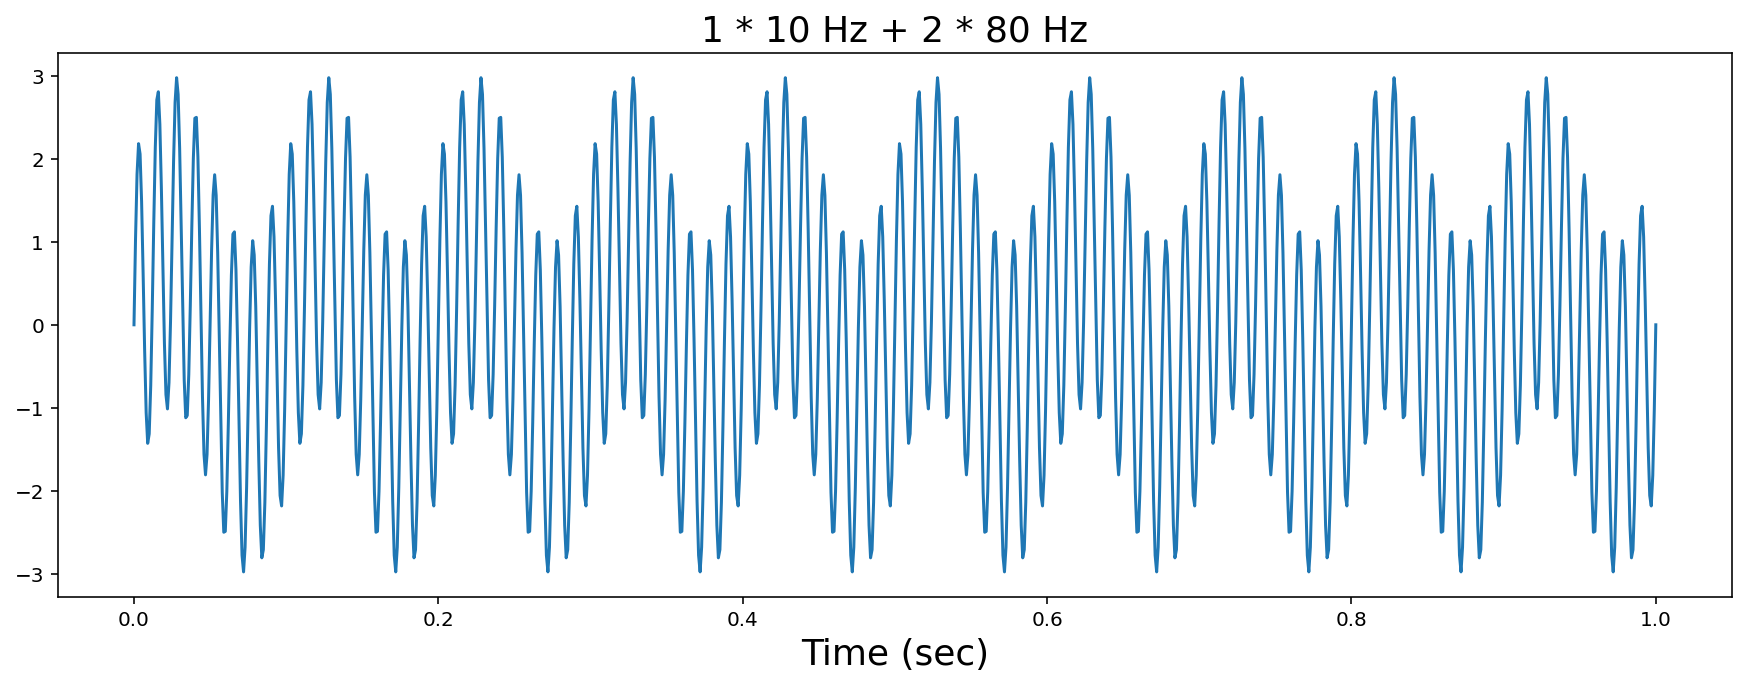

In [92]:
time_sec = np.arange(0, 1.001, 0.001)
data10Hz = np.sin(2 * np.pi * 10 * time_sec)
data80Hz = 2 * np.sin(2 * np.pi * 80 * time_sec)
data = data10Hz + data80Hz
plt.plot(time_sec, data)
plt.xlabel('Time (sec)')
plt.title('1 * 10 Hz + 2 * 80 Hz');

# <font color=red>Exercise</font>

Replot the simulated data sampled at 1 kHz overlaid with what it would look like if you sampled it at 25 Hz.

In [ ]:
plt.plot(time_sec, data)  # original
plt.plot(time_sec[...], data[...], 'o-');  # downsampled
plt.xlabel('Time (sec)');

# Fourier Transform

* Describe any waveform as the summation of simple sinusoidal signals at various frequencies.
* The Fourier transform of a waveform tells us how much of each frequency component is in the waveform.
* It converts a time domain waveform to a frequency domain signal.
* It is invertable, so we can also convert back from frequency to time domains.
* The concept is also valid for space and spatial frequencies.

# Fourier Transform

![FFT](images/fourier_comps.png)

# Fourier Transform

Any waveform, even a square pulse, can be built out of sinusoidal signals of varying amplitude and frequency.

![FFT](images/fourier_rect_comps.png)

### 10 Hz + 80 Hz waveform

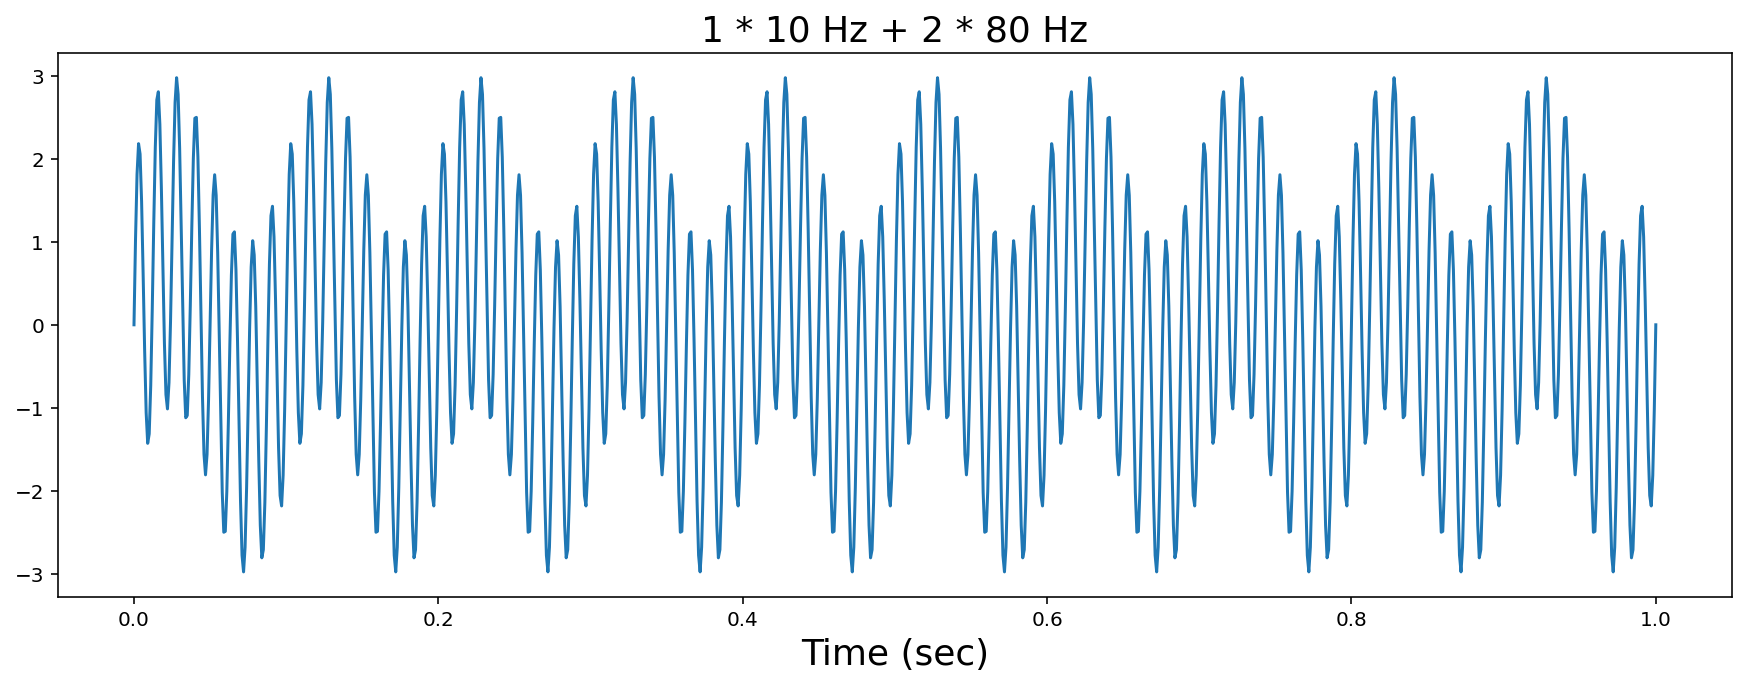

In [124]:
plt.plot(time_sec, data)
plt.xlabel('Time (sec)')
plt.title('1 * 10 Hz + 2 * 80 Hz');

In [95]:
sampleInterval_sec = time_sec[1] - time_sec[0]
sampleFreq_Hz = 1 / sampleInterval_sec
# Fastest frequency that we can resolve at the above sample rate
nyquistFreq_Hz = sampleFreq_Hz / 2

sampleFreq_Hz, nyquistFreq_Hz

(1000.0, 500.0)

### Fast Fourier Transform (FFT)

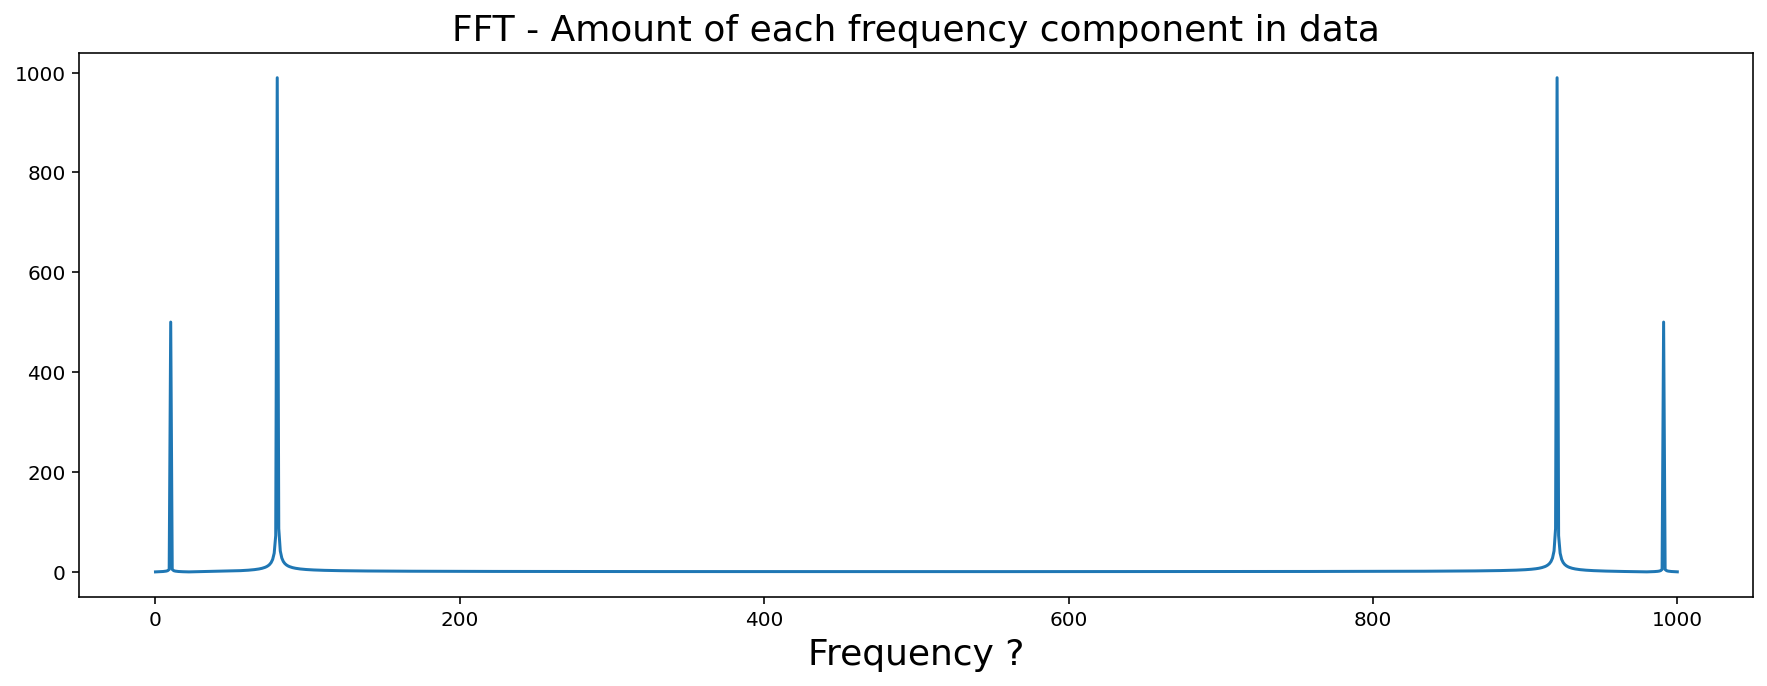

In [125]:
fft = np.fft.fft(data)

plt.plot(np.abs(fft))
plt.xlabel('Frequency ?')
plt.title('FFT - Amount of each frequency component in data');

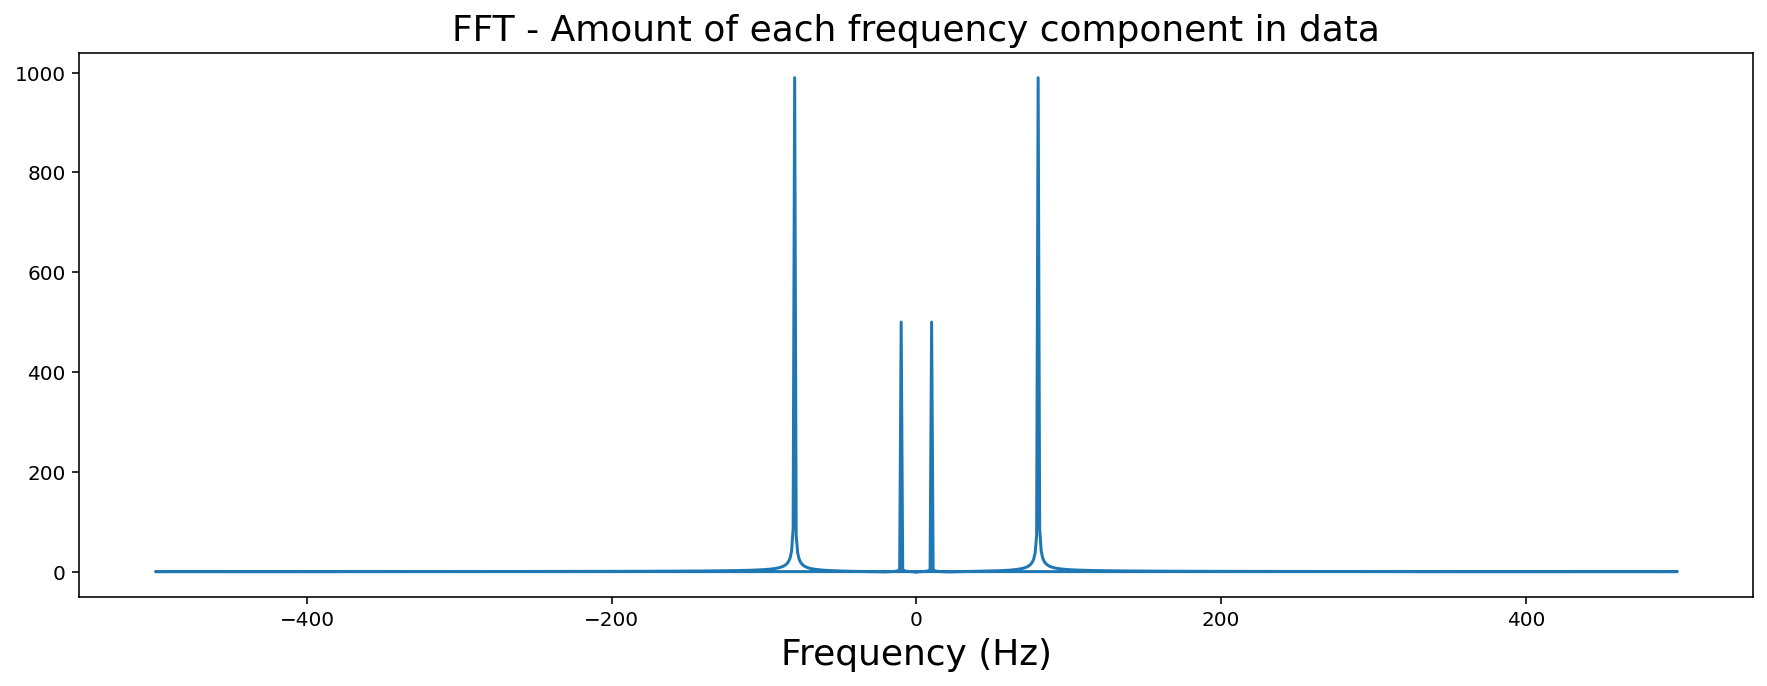

In [118]:
freq_Hz = np.fft.fftfreq(len(fft), sampleInterval_sec)

plt.plot(freq_Hz, np.abs(fft))
plt.xlabel('Frequency (Hz)')
plt.title('FFT - Amount of each frequency component in data');

### For real inputs, positive and negative frequency components are symmetrical.
### So typically just look at positive frequencies up to the Nyquist frequency.

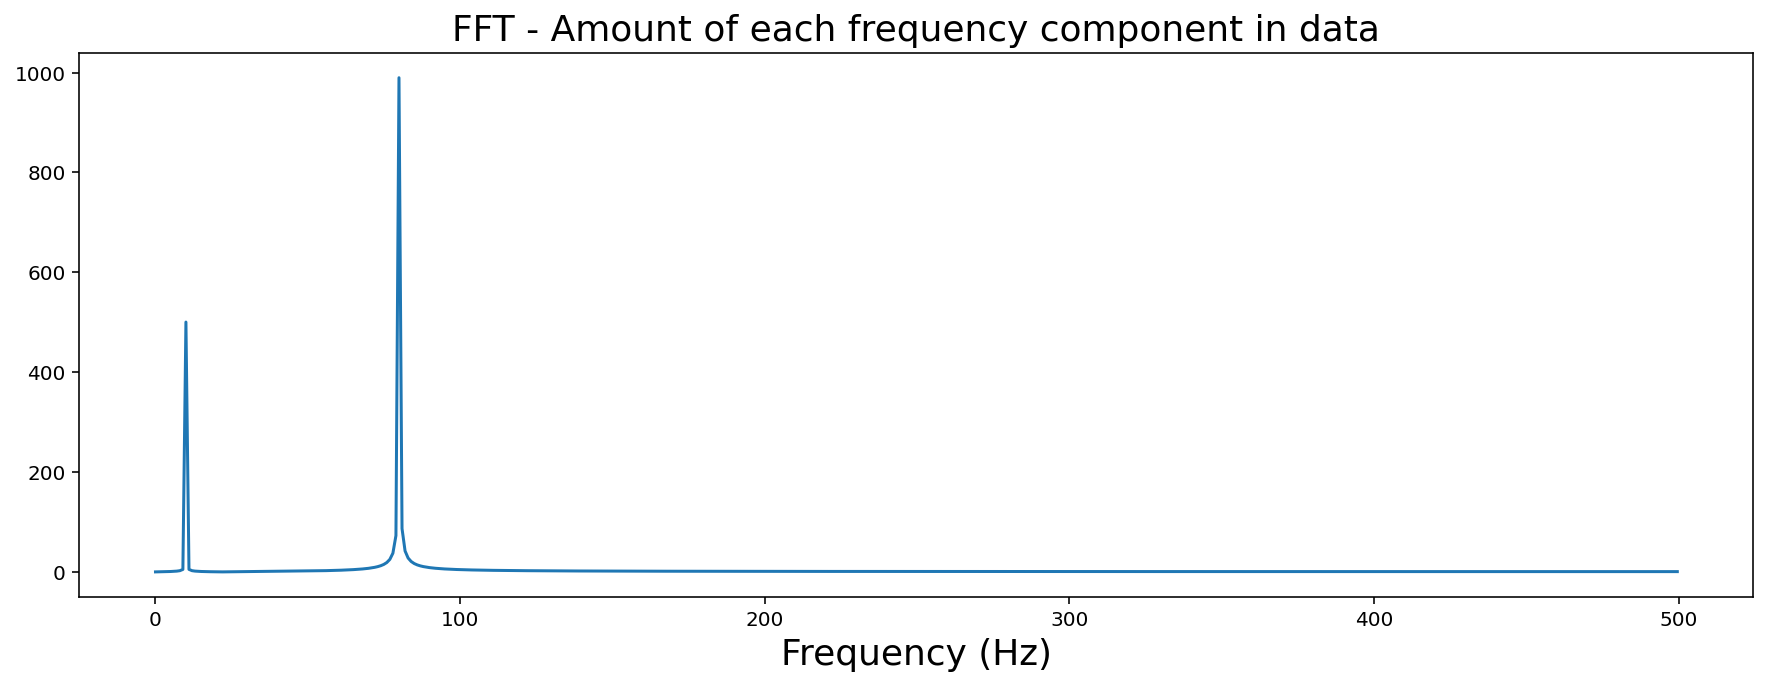

In [119]:
ind = np.where(freq_Hz >= 0)[0]

plt.plot(freq_Hz[ind], np.abs(fft[ind]))
plt.xlabel('Frequency (Hz)')
plt.title('FFT - Amount of each frequency component in data');

### Inverse FFT returns to original time series

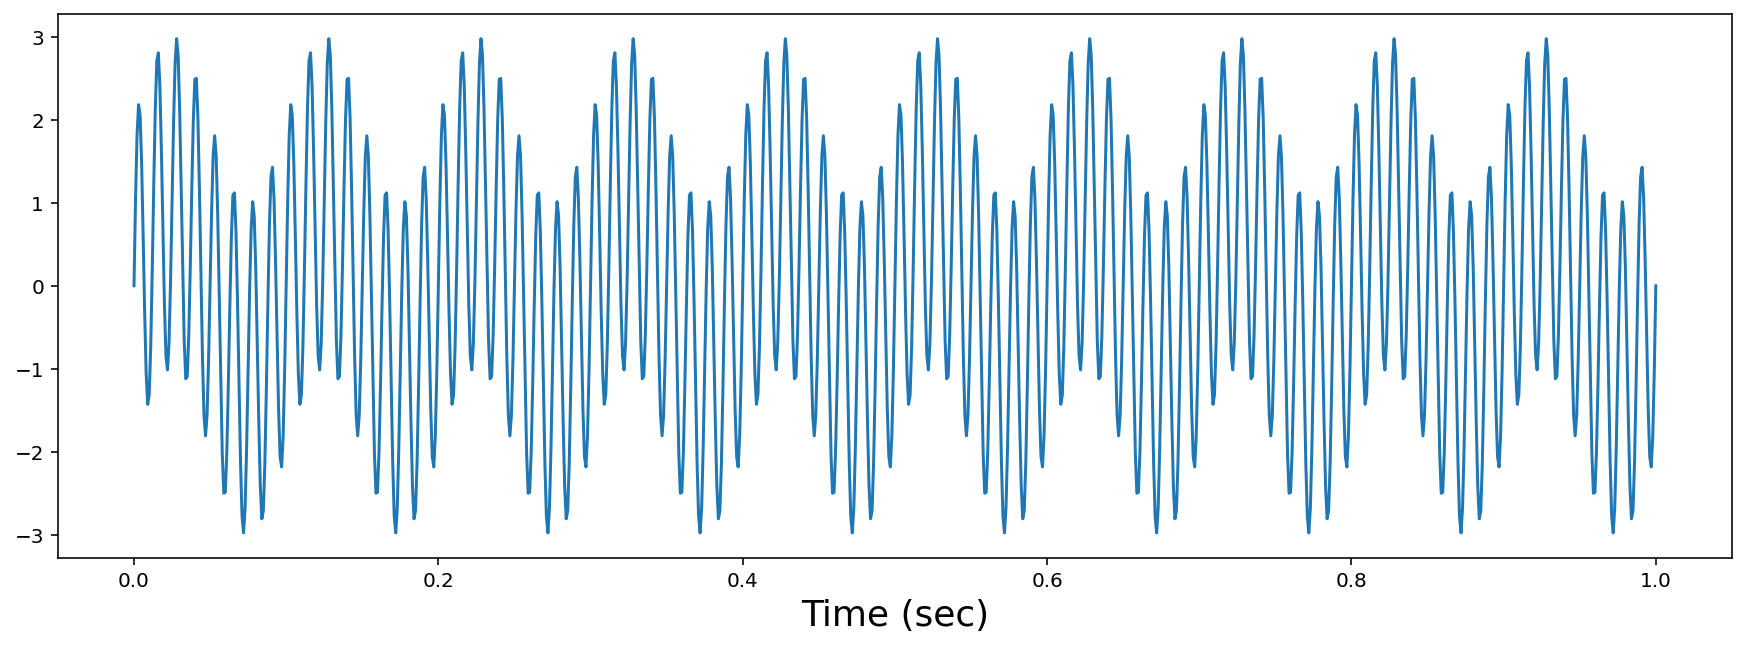

In [129]:
data2 = np.real(np.fft.ifft(fft))

plt.plot(time_sec, data2)
plt.xlabel('Time (sec)');

### Manipulating a time series in frequency space.

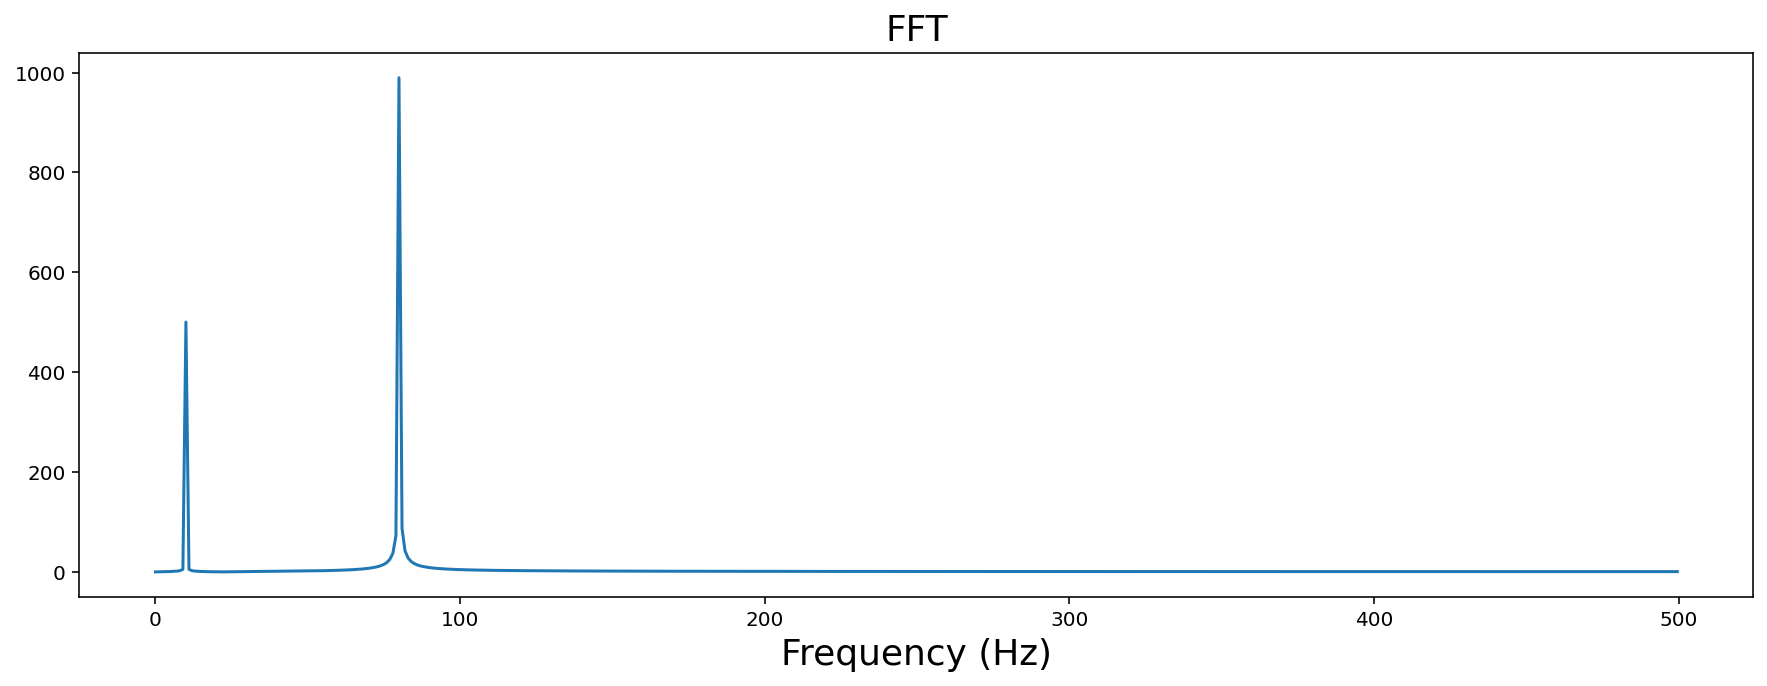

In [130]:
plt.plot(freq_Hz[ind], np.abs(fft[ind]))
plt.xlabel('Frequency (Hz)')
plt.title('FFT');

### Manipulating a time series in frequency space.

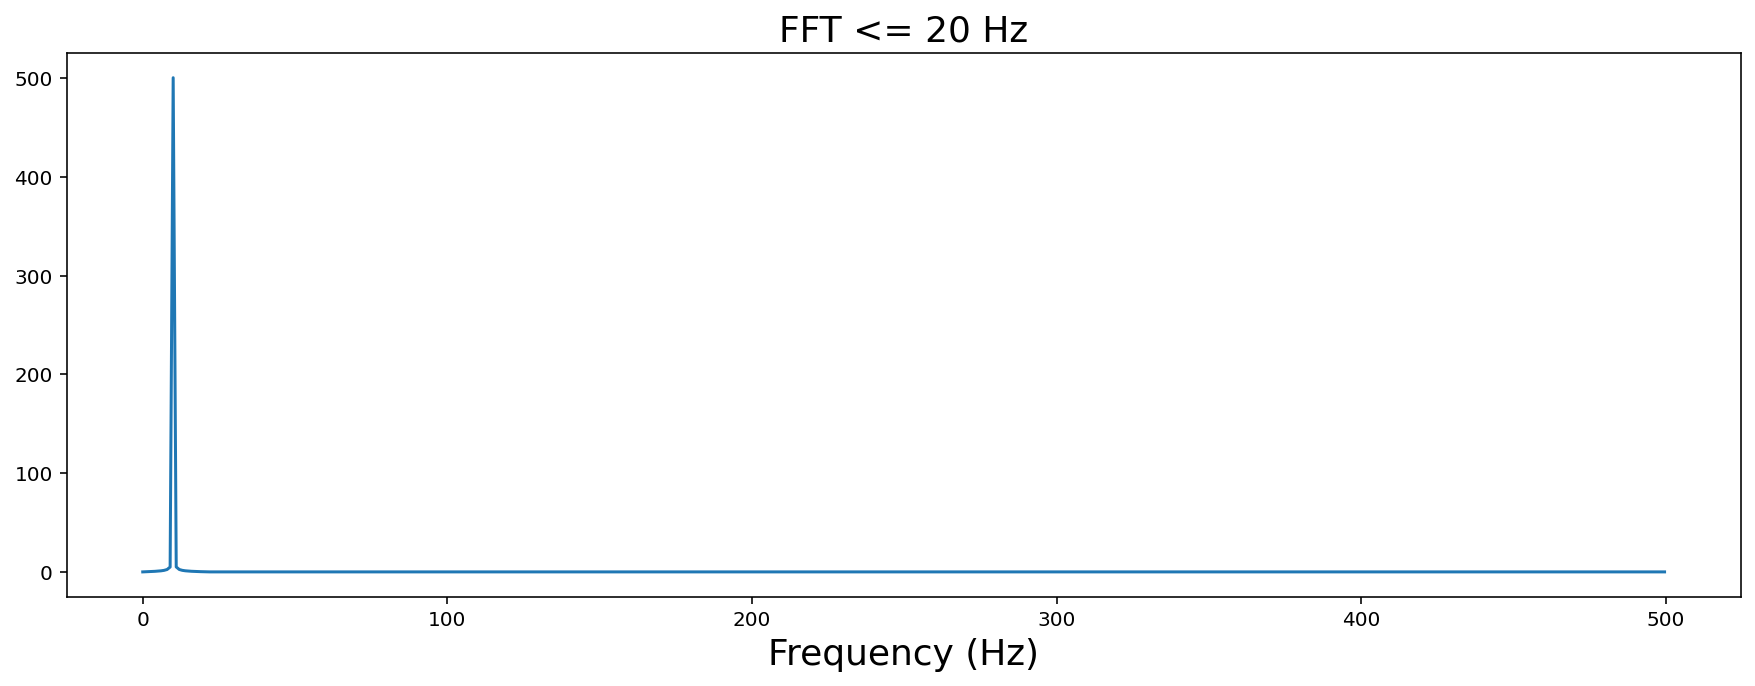

In [131]:
idx = np.where(np.abs(freq_Hz) > 20)[0]
fft10only = fft.copy()
fft10only[idx] = 0

plt.plot(freq_Hz[ind], np.abs(fft10only[ind]))
plt.xlabel('Frequency (Hz)')
plt.title('FFT <= 20 Hz');

### Manipulating a time series in frequency space.

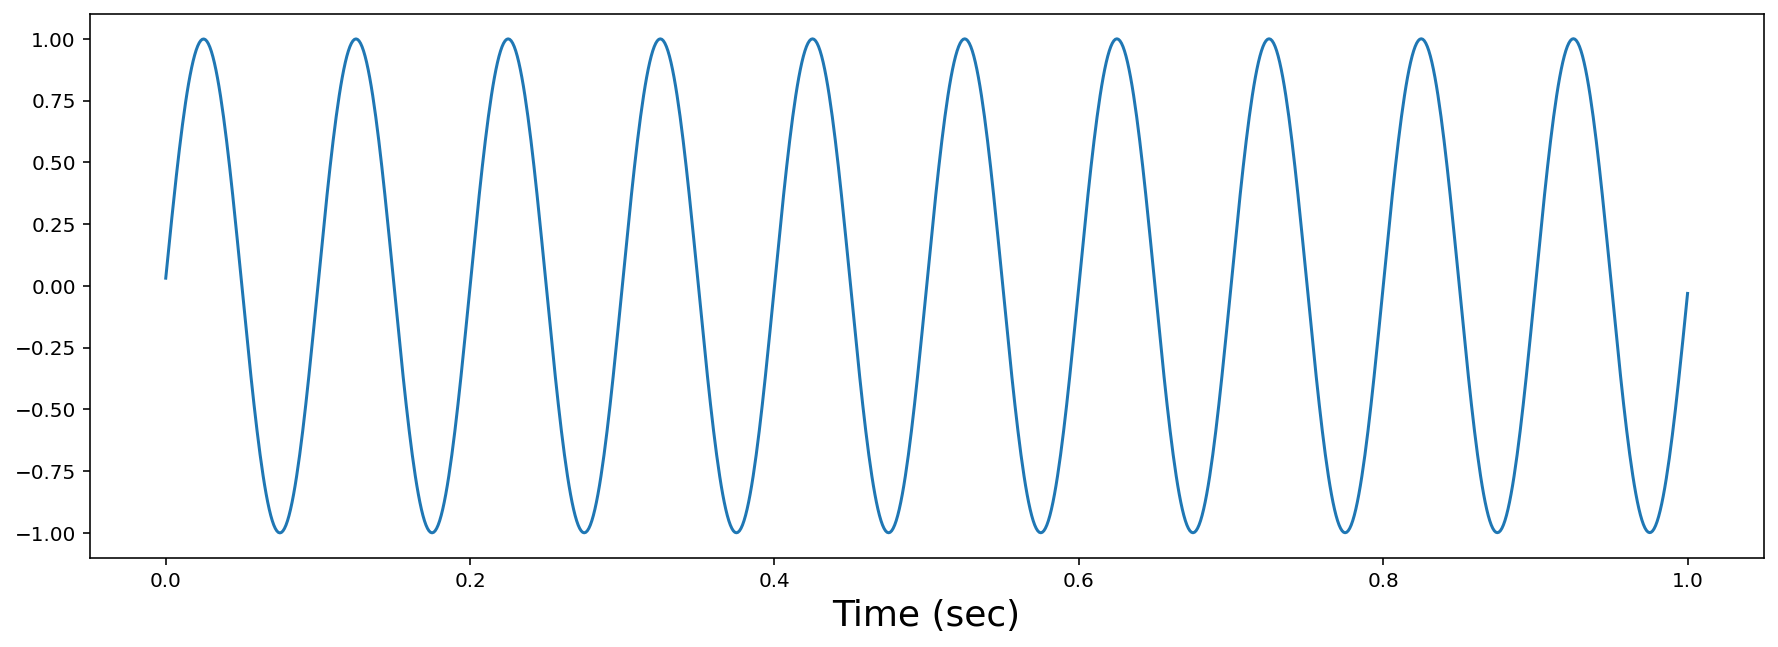

In [123]:
data10only = np.real(np.fft.ifft(fft10only))

plt.plot(time_sec, data10only)
plt.xlabel('Time (sec)');

### Let's examine the frequency components of our 25 Hz downsampled data.

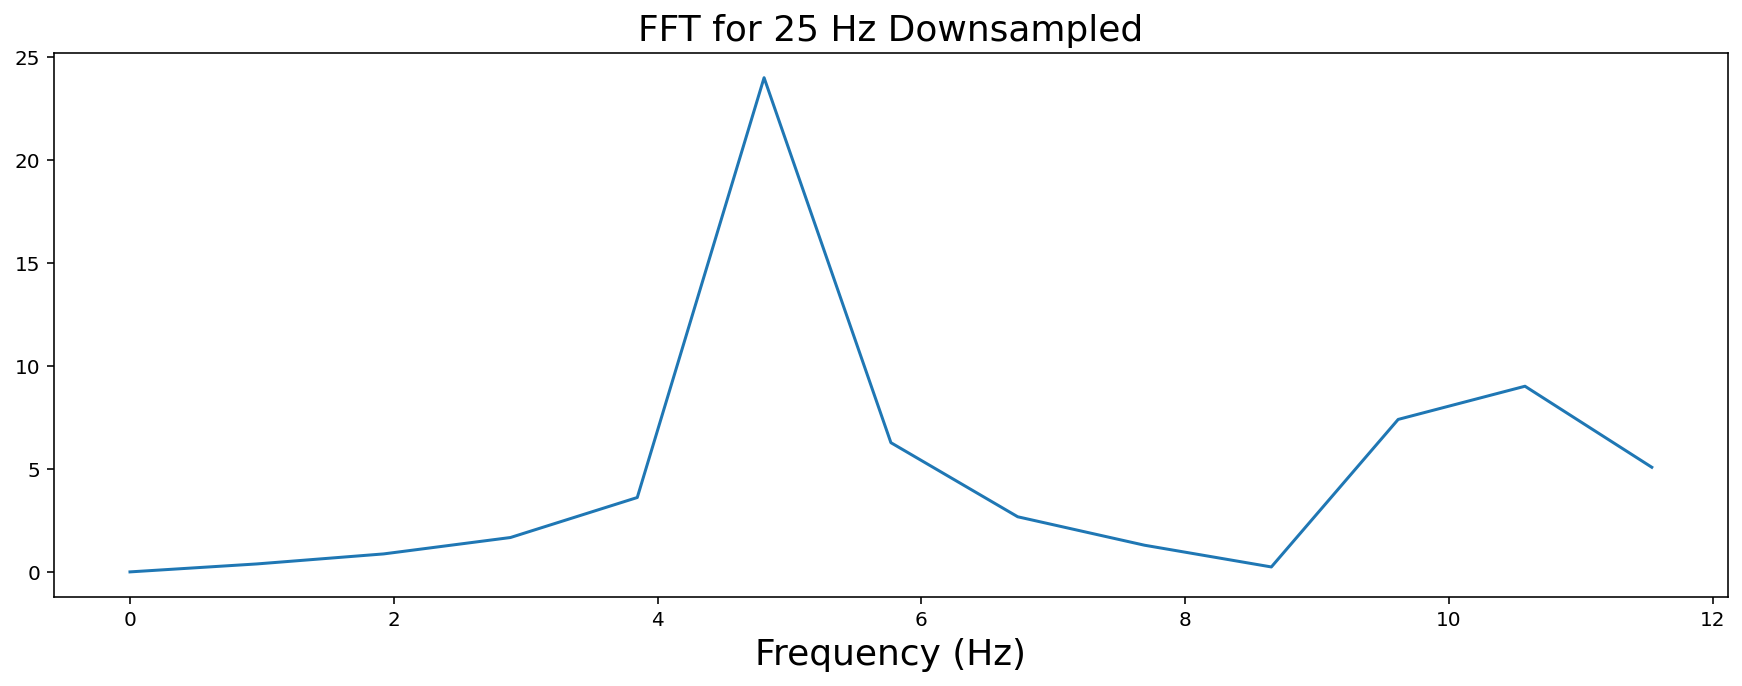

In [132]:
fft = np.fft.fft(data[::40])
freq_Hz = np.fft.fftfreq(len(fft), 1/25)
ind = np.where(freq_Hz >= 0)[0]

plt.plot(freq_Hz[ind], np.abs(fft[ind]))
plt.xlabel('Frequency (Hz)')
plt.title('FFT for 25 Hz Downsampled');

# FFT of a more complex signal.

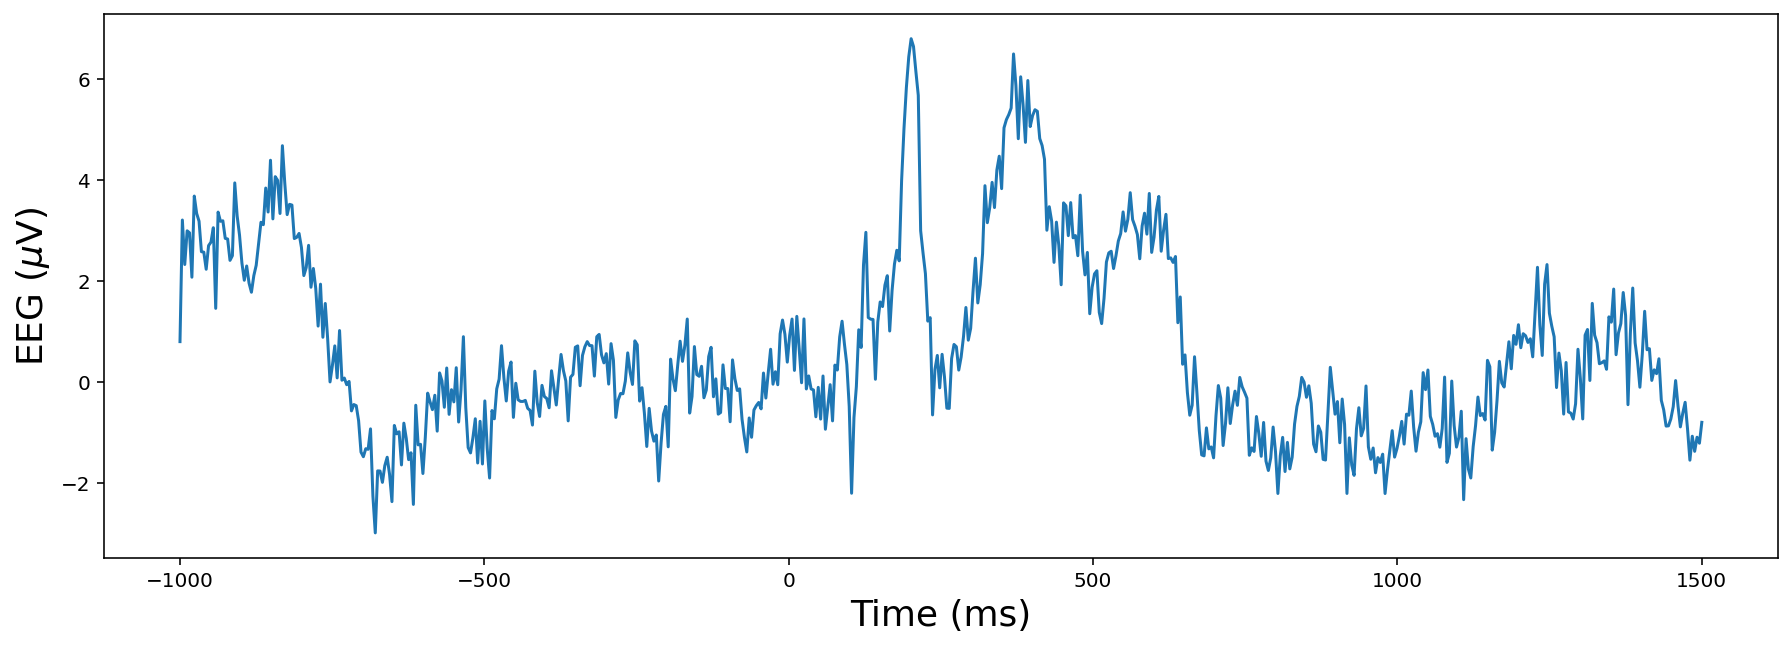

In [104]:
time_ms = np.linspace(-1000, 1500, len(eeg_uV))

plt.plot(time_ms, eeg_uV)
plt.xlabel('Time (ms)')
plt.ylabel('EEG ($\mu$V)');

# <font color=red>Exercise</font>

Compute the FFT of the EEG time series and plot the frequency components.

In [ ]:
dt_sec = ...
fft = ...
freq_Hz = ...
ind = ...

plt.plot(freq_Hz[ind], np.abs(fft[ind]))
plt.xlabel('Frequency (Hz)')
plt.title('EEG');

# Power Spectrum

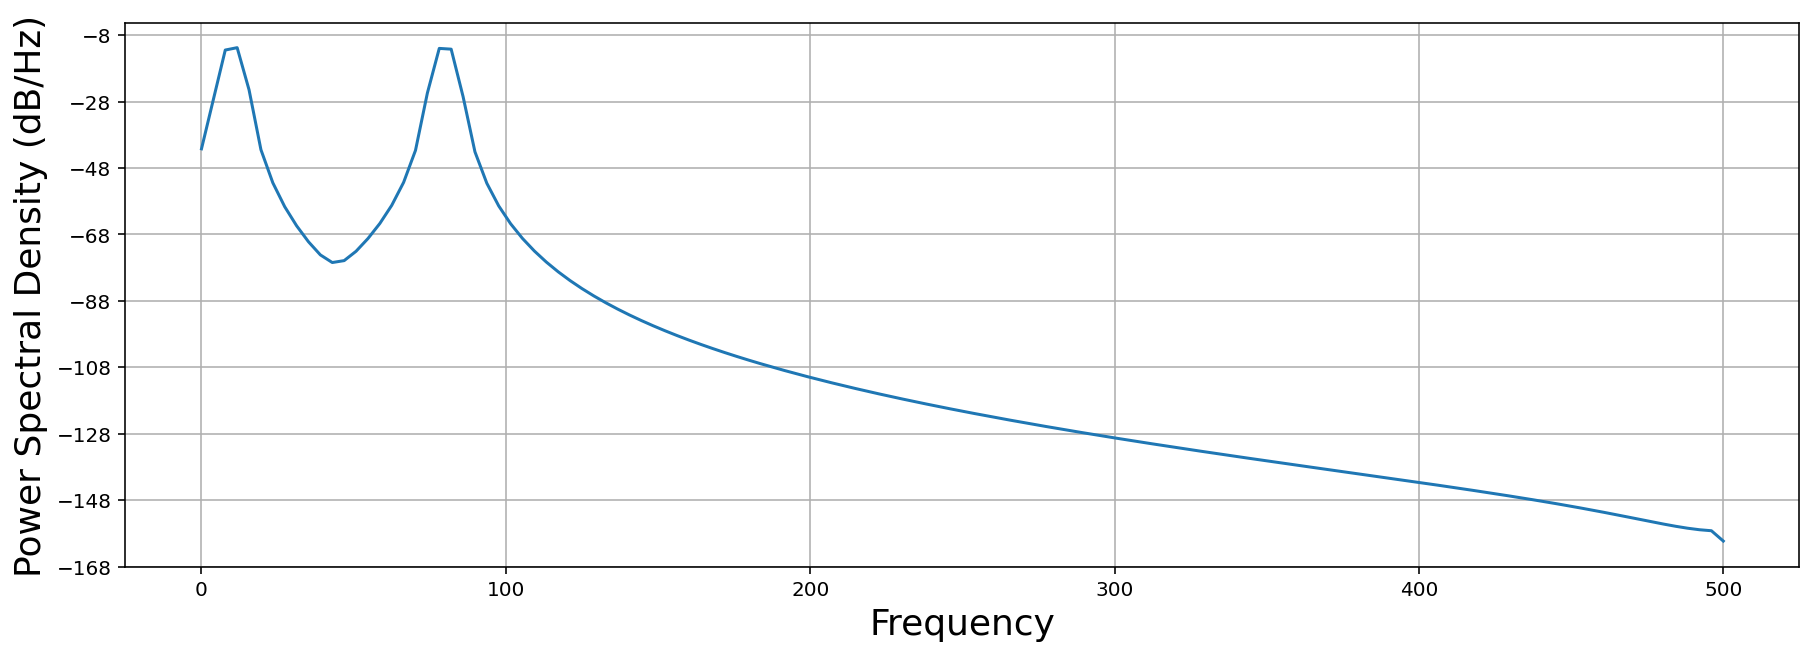

In [80]:
sampleFreq_Hz = 1000

plt.psd(data, Fs=sampleFreq_Hz);

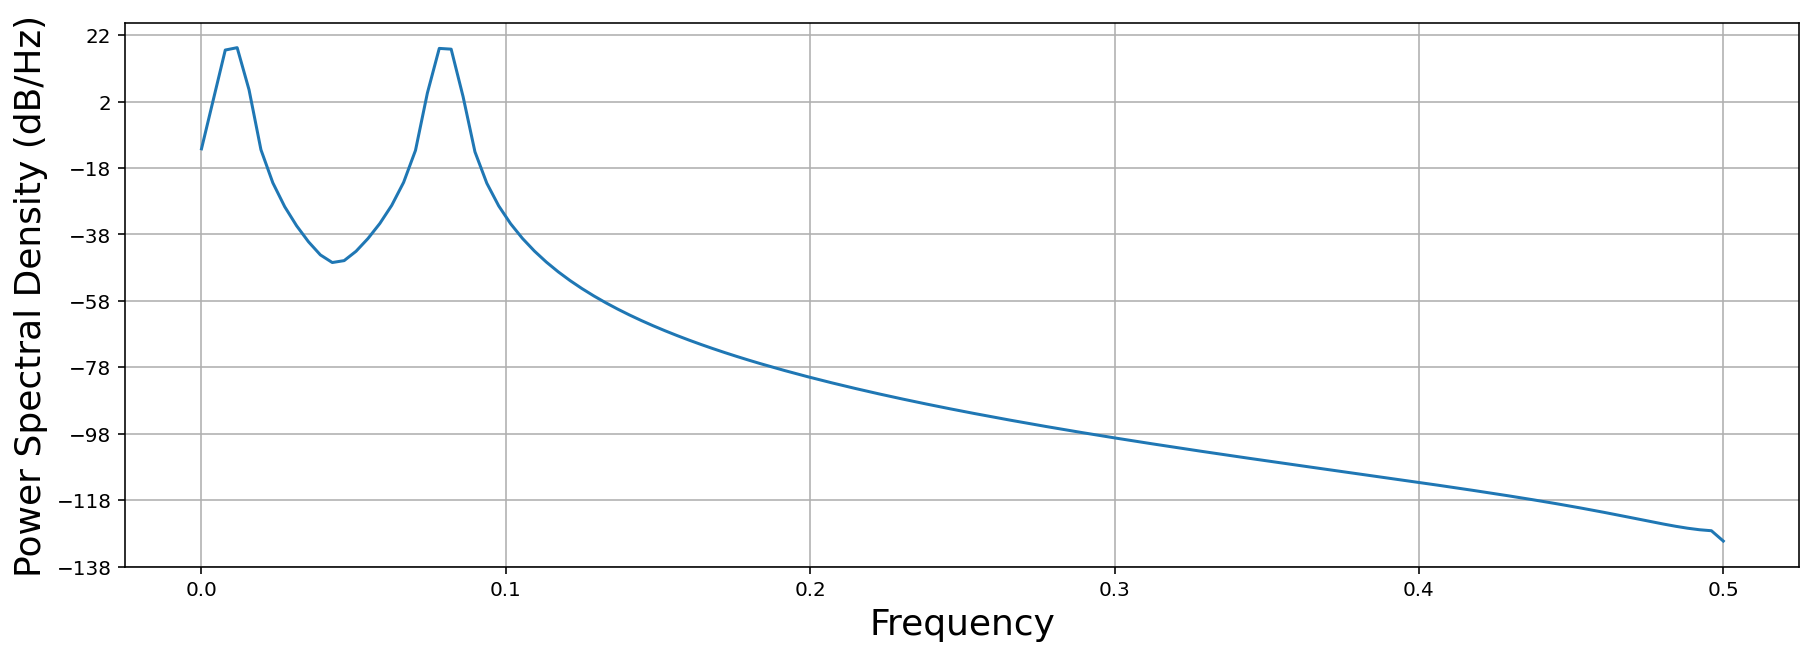

In [81]:
sampleFreq_kHz = 1

plt.psd(data, Fs=sampleFreq_kHz);

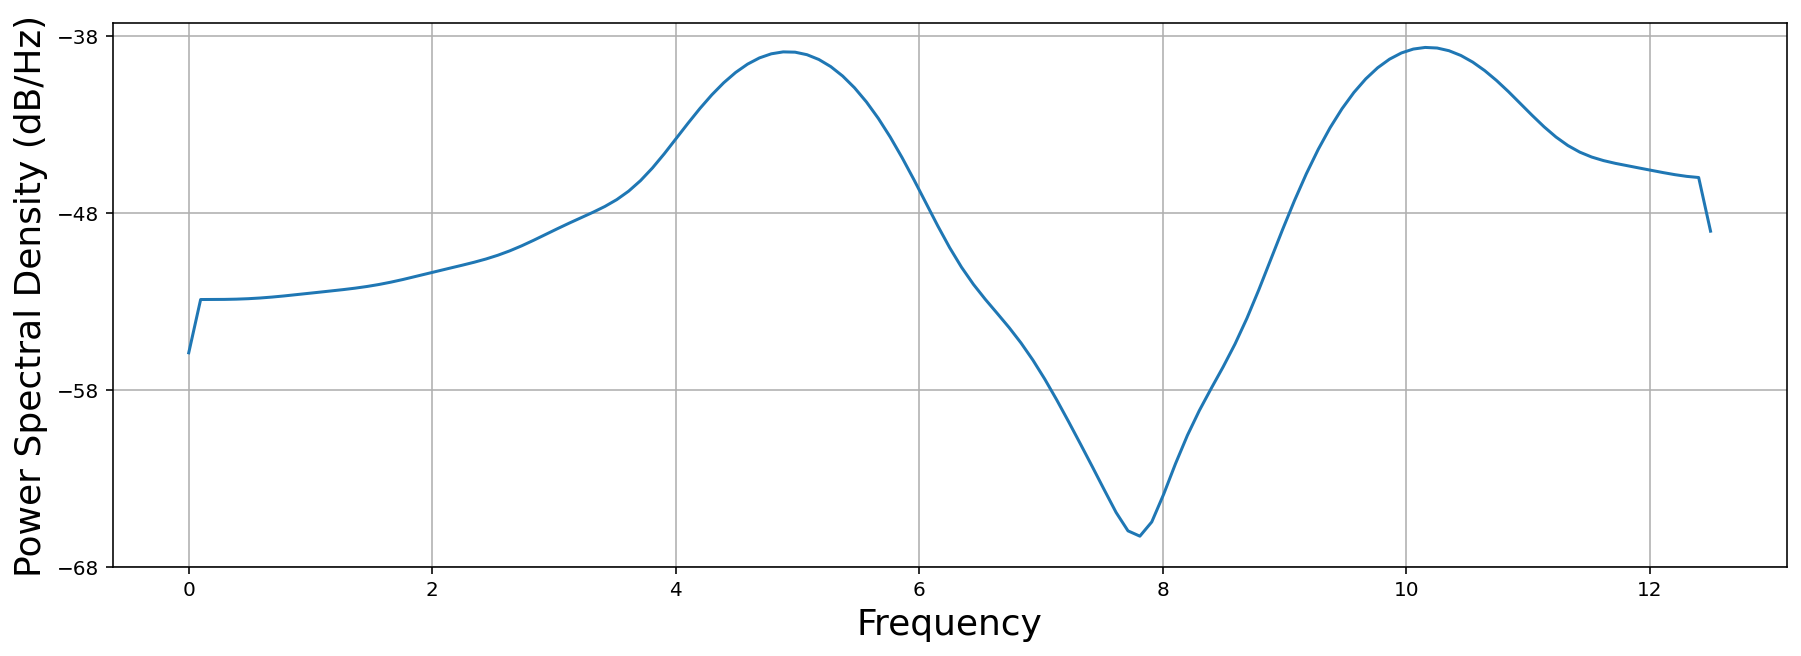

In [78]:
plt.psd(data[::40], Fs=25);